In [2]:
import pandas as pd
import numpy as np

df0=pd.read_csv("exp123_page1.csv", encoding='utf8')
df1=pd.read_csv("exp123_page2.csv", encoding='utf8')

#df.head

In [3]:
title = ['F1','F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'M1', 'M2', 'M3', 
         'M5', 'M6', 'M7','M8', 'M9']

for index, row in df1.iterrows():
    for t in title:
        f1ans = row[t].strip().split('-')
        ans2 = [a.split(' ') for a in f1ans]
        ans = [item for sublist in ans2 for item in sublist]
        if (len(ans) != 16):
            print('[', t, index + 2, ']', len(ans), ans)


[ M2 13 ] 20 ['i', '51', 'lu', '51', 'liŋ', '51', 'ly', '51', 'li', '51', 'ly', '51', 'ly', '51', 'ly', '51', 'li', '51', 'lu', '51']


In [4]:
title = ['F1','F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'M1', 'M2', 'M3', 
         'M5', 'M6', 'M7','M8', 'M9']
phoneme=[]
vowel=['i', 'y', 'e', 'ɛ',  'a', 'ɨ', 'ə', 'u', 'o', 'ɔ', 'ɤ']
consonent=['p', 'pʰ', 'm', 'f', 't', 'tʰ', 'n', 'l', 's', 'ʂ', 'ʐ', 'ts', 'tsʰ', 'tʂ', 'tʂʰ', 'ɕ', 'tɕ', 'tɕʰ', 'k', 'kʰ',    
           'ŋ',  'x', 'j', 'ɥ', 'w']
fsound=['51','55','35','21', 'y']
phoneme = vowel + consonent
sorted_phoneme = sorted(phoneme, key=len, reverse=True)
#sorted_phoneme.remove('x')
#sorted_phoneme.append('x')
sorted_phoneme.append('_')

print(consonent, vowel)
print(sorted_phoneme)

['p', 'pʰ', 'm', 'f', 't', 'tʰ', 'n', 'l', 's', 'ʂ', 'ʐ', 'ts', 'tsʰ', 'tʂ', 'tʂʰ', 'ɕ', 'tɕ', 'tɕʰ', 'k', 'kʰ', 'ŋ', 'x', 'j', 'ɥ', 'w'] ['i', 'y', 'e', 'ɛ', 'a', 'ɨ', 'ə', 'u', 'o', 'ɔ', 'ɤ']
['tsʰ', 'tʂʰ', 'tɕʰ', 'pʰ', 'tʰ', 'ts', 'tʂ', 'tɕ', 'kʰ', 'i', 'y', 'e', 'ɛ', 'a', 'ɨ', 'ə', 'u', 'o', 'ɔ', 'ɤ', 'p', 'm', 'f', 't', 'n', 'l', 's', 'ʂ', 'ʐ', 'ɕ', 'k', 'ŋ', 'x', 'j', 'ɥ', 'w', '_']


In [5]:
fsconf = pd.DataFrame(0, columns=fsound, index=fsound)

print(fsconf)

    51  55  35  21  y
51   0   0   0   0  0
55   0   0   0   0  0
35   0   0   0   0  0
21   0   0   0   0  0
y    0   0   0   0  0


In [6]:
def phoneme_analysis(item):
    #print(item)
    if item == '':
        return []
    
    for i in sorted_phoneme:
        if item.find(i) == 0:
            #print("Match", i)
            sl=[i]
            srl=phoneme_analysis(item[len(i):])
            if srl is None:
                print("No match", item)
                return sl
            else:
                return(sl+srl)

In [7]:
def LD(s, t):
    if not s :
        return len(t)
    if not t :
        return len(s)
    if s[-1] == t[-1]:
        cost = 0
    else:
        cost = 1
    
    A = LD(s[:-1], t)+1
    B = LD(s, t[:-1])+1
    C = LD(s[:-1], t[:-1]) + cost
    res = min([A, B, C])

    return res

#print(LD("Python", "Peithen"))

In [8]:
def wf(word_1, word_2):
    n = len(word_1) + 1  # counting empty string 
    m = len(word_2) + 1  # counting empty string

    # initialize D matrix
    D = np.zeros(shape=(n, m), dtype=np.int)
    D[:,0] = range(n)
    D[0,:] = range(m)

    # B is the backtrack matrix. At each index, it contains a triple
    # of booleans, used as flags. if B(i,j) = (1, 1, 0) for example,
    # the distance computed in D(i,j) came from a deletion or a
    # substitution. This is used to compute backtracking later.
    B = np.zeros(shape=(n, m), dtype=[("del", 'b'), 
                      ("sub", 'b'),
                      ("ins", 'b')])
    B[1:,0] = (1, 0, 0) 
    B[0,1:] = (0, 0, 1)

    for i, l_1 in enumerate(word_1, start=1):
        for j, l_2 in enumerate(word_2, start=1):
            deletion = D[i-1,j] + 1
            insertion = D[i, j-1] + 1
            substitution = D[i-1,j-1] + (0 if l_1==l_2 else 2)

            mo = np.min([deletion, insertion, substitution])

            B[i,j] = (deletion==mo, substitution==mo, insertion==mo)
            D[i,j] = mo

    return D, B

def naive_backtrace(B_matrix):
    i, j = B_matrix.shape[0]-1, B_matrix.shape[1]-1
    backtrace_idxs = [(i, j)]

    while (i, j) != (0, 0):
        if B_matrix[i,j][1]:
            i, j = i-1, j-1
        elif B_matrix[i,j][0]:
            i, j = i-1, j
        elif B_matrix[i,j][2]:
            i, j = i, j-1
        backtrace_idxs.append((i,j))

    return backtrace_idxs

def align(word_1, word_2, bt):
    aligned_word_1 = []
    aligned_word_2 = []
    operations = []

    backtrace = bt[::-1]  # make it a forward trace

    for k in range(len(backtrace) - 1): 
        i_0, j_0 = backtrace[k]
        i_1, j_1 = backtrace[k+1]

        w_1_letter = None
        w_2_letter = None
        op = None

        if i_1 > i_0 and j_1 > j_0:  # either substitution or no-op
            if word_1[i_0] == word_2[j_0]:  # no-op, same symbol
                w_1_letter = word_1[i_0]
                w_2_letter = word_2[j_0]
                op = "//"
            else:  # cost increased: substitution
                w_1_letter = word_1[i_0]
                w_2_letter = word_2[j_0]
                op = "s"
        elif i_0 == i_1:  # insertion
            w_1_letter = " "
            w_2_letter = word_2[j_0]
            op = "i"
        else: #  j_0 == j_1,  deletion
            w_1_letter = word_1[i_0]
            w_2_letter = " "
            op = "d"

        aligned_word_1.append(w_1_letter)
        aligned_word_2.append(w_2_letter)
        operations.append(op)

    return aligned_word_1, aligned_word_2, operations

In [9]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

def plot_conf(conconf, vowconf):
    plt.figure(figsize = (15,12))
    #plt.figure()
    sn.heatmap(conconf, annot=True, fmt="d", cmap="YlGnBu")
    plt.xlabel('Target', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel('Response', fontsize = 15)
    
    plt.figure(figsize=(15,12))
    #plt.figure()
    sn.heatmap(vowconf, annot=True, fmt="d", cmap="YlGnBu")
    plt.xlabel('Target', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel('Response', fontsize = 15)

len diff: ['tʰ', 'a'] ['t', 'a', 'w']
len diff: ['m', 'a'] ['p', 'a', 'w']
len diff: ['p', 'a', 'n'] ['p', 'a']
len diff: ['m', 'a', 'w'] ['n', 'u']
len diff: ['m', 'a', 'w'] ['m', 'u']
len diff: ['ts', 'a', 'w'] ['n', 'u']
len diff: ['p', 'a', 'n'] ['p', 'u']
len diff: ['t', 'a', 'w'] ['t', 'u']
len diff: ['tʰ', 'a', 'n'] ['t', 'a']
len diff: ['l', 'a', 'w'] ['n', 'u']
len diff: ['s', 'a', 'n'] ['s', 'a']
len diff: ['m', 'a', 'n'] ['n', 'a']
len diff: ['n', 'a', 'w'] ['n', 'a']
len diff: ['l', 'a'] ['m', 'a', 'n']
len diff: ['m', 'a', 'n'] ['n', 'a']
len diff: ['m', 'a'] ['tʂ', 'a', 'n']
len diff: ['m', 'a', 'n'] ['tʂ', 'a']
len diff: ['l', 'a', 'n'] ['m', 'a']
len diff: ['pʰ', 'a', 'n'] ['t', 'a']
len diff: ['s', 'a', 'w'] ['n', 'u']
len diff: ['l', 'a', 'w'] ['l', 'u']
len diff: ['s', 'a'] ['s', 'a', 'n']
len diff: ['tʰ', 'a'] ['tʰ', 'a', 'n']
len diff: ['m', 'a'] ['m', 'a', 'n']
len diff: ['m', 'a'] ['m', 'a', 'n']
len diff: ['tʂ', 'a', 'n'] ['tʂ', 'a']
len diff: ['n', 'a'] ['n', '

len diff: ['t', 'a', 'w'] ['p', 'u']
len diff: ['tʂ', 'a'] ['t', 'a', 'n']
len diff: ['tʂ', 'a', 'n'] ['tʰ', 'a']
len diff: ['s', 'a'] ['s', 'a', 'n']
len diff: ['n', 'a'] ['s', 'a', 'n']
len diff: ['s', 'a', 'n'] ['tʰ', 'a']
len diff: ['n', 'a', 'w'] ['t', 'u']
len diff: ['l', 'a'] ['n', 'a', 'n']
len diff: ['tʂ', 'a', 'n'] ['l', 'a']
len diff: ['tʰ', 'a', 'w'] ['pʰ', 'u']
len diff: ['ʂ', 'a', 'w'] ['ʂ', 'u']
len diff: ['m', 'a', 'w'] ['f', 'u']
len diff: ['pʰ', 'a', 'w'] ['p', 'u']
len diff: ['pʰ', 'a', 'n'] ['pʰ', 'a']
len diff: ['n', 'a'] ['ts', 'a', 'n']
len diff: ['n', 'a', 'w'] ['ts', 'u']
len diff: ['n', 'a', 'w'] ['m', 'u']
len diff: ['l', 'a', 'w'] ['m', 'u']
len diff: ['m', 'a', 'w'] ['m', 'u']
len diff: ['l', 'a', 'w'] ['m', 'u']
len diff: ['ʂ', 'a', 'w'] ['p', 'u']
len diff: ['tʂʰ', 'a', 'w'] ['tʂʰ', 'u']
len diff: ['l', 'a'] ['tʂʰ', 'a', 'n']
len diff: ['ts', 'a', 'n'] ['ts', 'a']
len diff: ['l', 'a'] ['l', 'a', 'n']
len diff: ['s', 'a'] ['s', 'a', 'n']
len diff: ['x', 'a

len diff: ['s', 'a'] ['s', 'a', 'n']
len diff: ['tʰ', 'a'] ['t', 'a', 'n']
len diff: ['t', 'u'] ['p', 'a', 'w']
len diff: ['n', 'a', 'w'] ['n', 'u']
len diff: ['m', 'a'] ['m', 'a', 'n']
len diff: ['p', 'a', 'n'] ['t', 'a']
len diff: ['m', 'a', 'w'] ['m', 'u']
len diff: ['m', 'a'] ['m', 'a', 'n']
len diff: ['tʂ', 'a', 'n'] ['tʰ', 'a']
len diff: ['n', 'a'] ['n', 'a', 'n']
len diff: ['tʂ', 'u'] ['t', 'a', 'w']
len diff: ['tʂ', 'a', 'n'] ['tʂ', 'a']
len diff: ['n', 'a', 'w'] ['l', 'u']
len diff: ['ts', 'a'] ['tʰ', 'a', 'n']
len diff: ['tʰ', 'u'] ['ts', 'a', 'w']
len diff: ['p', 'u'] ['t', 'a', 'w']
len diff: ['tʂ', 'a'] ['tʂ', 'a', 'n']
len diff: ['tʰ', 'u'] ['t', 'a', 'w']
len diff: ['tʂ', 'a', 'w'] ['n', 'u']
len diff: ['tʂ', 'a', 'n'] ['tʂ', 'a']
len diff: ['tʰ', 'a', 'w'] ['p', 'u']
len diff: ['n', 'a'] ['s', 'a', 'n']
len diff: ['l', 'a'] ['l', 'a', 'n']
len diff: ['tʂ', 'a', 'n'] ['tʂʰ', 'a']
len diff: ['l', 'a', 'w'] ['n', 'u']
len diff: ['ʂ', 'a'] ['ʂ', 'a', 'n']
len diff: ['tʰ', '

len diff: ['ʂ', 'a', 'w'] ['tʰ', 'u']
len diff: ['m', 'a'] ['m', 'a', 'n']
len diff: ['m', 'a', 'w'] ['tʰ', 'u']
len diff: ['pʰ', 'a'] ['p', 'a', 'n']
len diff: ['pʰ', 'a', 'w'] ['p', 'u']
len diff: ['n', 'a'] ['m', 'a', 'n']
len diff: ['ts', 'u'] ['ts', 'a', 'w']
len diff: ['n', 'a', 'w'] ['pʰ', 'u']
len diff: ['n', 'a'] ['n', 'a', 'n']
len diff: ['l', 'a'] ['m', 'a', 'n']
len diff: ['l', 'a', 'w'] ['m', 'u']
len diff: ['m', 'a'] ['m', 'a', 'n']
len diff: ['m', 'a', 'w'] ['m', 'u']
len diff: ['l', 'a', 'w'] ['n', 'u']
len diff: ['ʂ', 'a'] ['s', 'a', 'n']
len diff: ['ʂ', 'a', 'w'] ['m', 'u']
len diff: ['n', 'a'] ['m', 'a', 'n']
len diff: ['tsʰ', 'a'] ['l', 'a', 'n']
len diff: ['tsʰ', 'a', 'w'] ['tsʰ', 'u']
len diff: ['t', 'a', 'w'] ['t', 'j', 'a', 'w']
No match sɑn
len diff: ['s', 'a'] ['s']
len diff: ['pʰ', 'u'] ['p', 'a', 'w']
len diff: ['s', 'a', 'w'] ['tsʰ', 'u']
len diff: ['s', 'a', 'n'] ['a', 'n']
len diff: ['tʂʰ', 'a'] ['tsʰ', 'a', 'n']
len diff: ['l', 'a'] ['n', 'a', 'n']
len d

len diff: ['a', 'j'] ['w', 'a', 'j']
len diff: ['p', 'e', 'j'] ['t', 'w', 'e', 'j']
len diff: ['w', 'e', 'j'] ['a', 'n']
len diff: ['t', 'a', 'n'] ['t', 'w', 'e', 'j']
len diff: ['t', 'w', 'e', 'j'] ['w', 'e', 'j']
len diff: ['l', 'y'] ['y']
len diff: ['u'] ['l', 'u']
len diff: ['i'] ['i', 'ŋ']
len diff: ['y'] ['l', 'y']
len diff: ['i', 'ŋ'] ['l', 'i', 'ŋ']
len diff: ['y'] ['l', 'y']
len diff: ['l', 'y'] ['y']
len diff: ['o', 'ŋ'] ['w', 'a', 'ŋ']
len diff: ['ə', 'n'] ['w', 'ə', 'n']
len diff: ['w', 'ə', 'n'] ['ə', 'n']
len diff: ['u'] ['a', 'n']
len diff: ['tʰ', 'a', 'n'] ['tʰ', 'u']
len diff: ['a', 'n'] ['tʰ', 'a', 'n']
len diff: ['tʰ', 'a'] ['tʰ', 'a', 'n']
len diff: ['tʰ', 'o', 'w'] ['pʰ', 'u']
len diff: ['p', 'e', 'j'] ['t', 'w', 'e', 'j']
len diff: ['y'] ['l', 'y']
len diff: ['l', 'u'] ['u']
len diff: ['y'] ['l', 'y']
len diff: ['l', 'i'] ['y']
len diff: ['l', 'i', 'ŋ'] ['l', 'i']
len diff: ['y'] ['l', 'u']
len diff: ['i', 'ŋ'] ['l', 'i', 'ŋ']
len diff: ['ɤ'] ['l', 'u']
len diff: 

len diff: ['ə', 'n'] ['w', 'ə', 'n']
len diff: ['u'] ['pʰ', 'a']
len diff: ['tʰ', 'a', 'n'] ['u']
len diff: ['ɤ'] ['i', 'ŋ']
len diff: ['l', 'i', 'ŋ'] ['tʰ', 'ɤ']
len diff: ['i'] ['l', 'i', 'ŋ']
len diff: ['w', 'e', 'j'] ['a', 'n']
len diff: ['t', 'a', 'n'] ['tʂ', 'w', 'e', 'j']
len diff: ['u'] ['tʰ', 'u']
len diff: ['l', 'y'] ['y']
len diff: ['u'] ['l', 'ɤ']
len diff: ['l', 'i', 'ŋ'] ['i']
len diff: ['y'] ['l', 'y']
len diff: ['l', 'u'] ['u']
len diff: ['j', 'a'] ['ɤ']
len diff: ['j', 'a'] ['i']
len diff: ['p', 'i'] ['u']
len diff: ['i', 'ŋ'] ['u']
len diff: ['t', 'a', 'n'] ['p', 'i']
len diff: ['ts', 'ɨ'] ['ɤ']
len diff: ['ts', 'ɨ'] ['ɤ']
len diff: ['o', 'ŋ'] ['t', 'ə', 'ŋ']
len diff: ['ə', 'n'] ['w', 'ə', 'n']
len diff: ['i', 'n'] ['t', 'i', 'ŋ']
len diff: ['w', 'a'] ['w', 'a', 'ŋ']
len diff: ['u'] ['w', 'ɔ']
len diff: ['tʰ', 'a', 'n'] ['p', 'ɔ']
len diff: ['l', 'i', 'ŋ'] ['ɤ']
len diff: ['ɤ'] ['ə', 'n']
len diff: ['t', 'a', 'j'] ['tʰ', 'u']
len diff: ['pʰ', 'a', 'n'] ['pʰ', 'a']
le

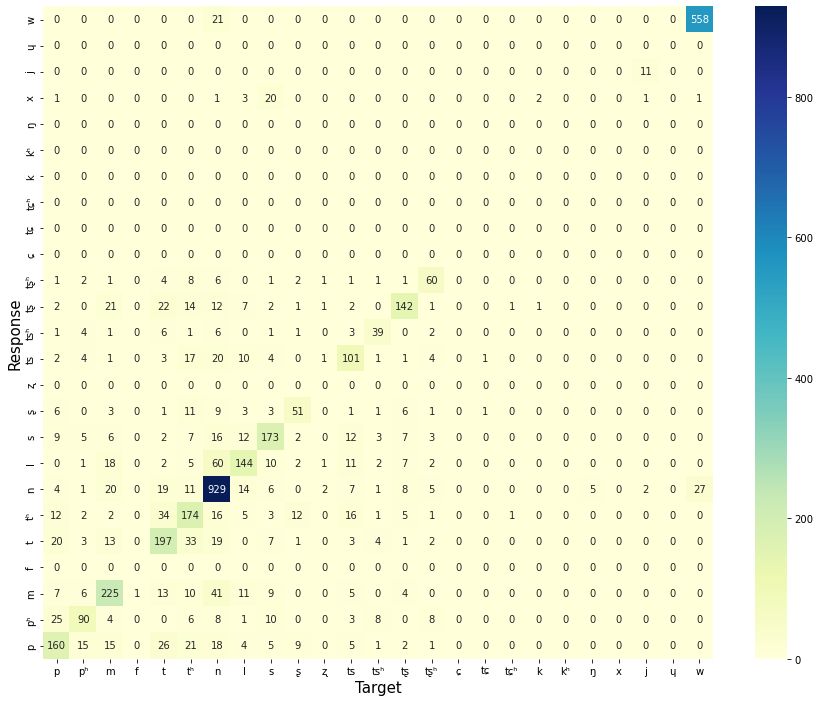

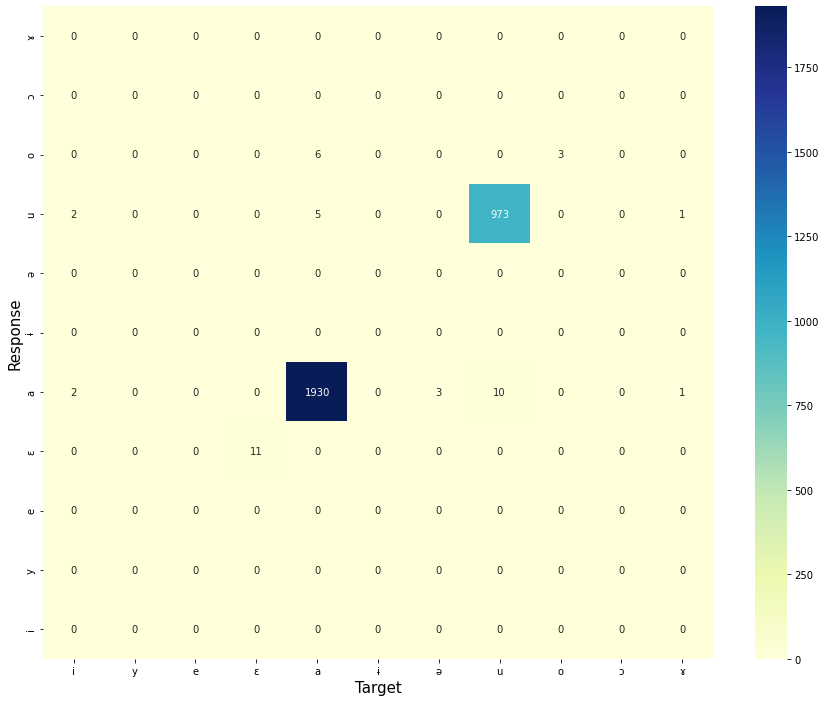

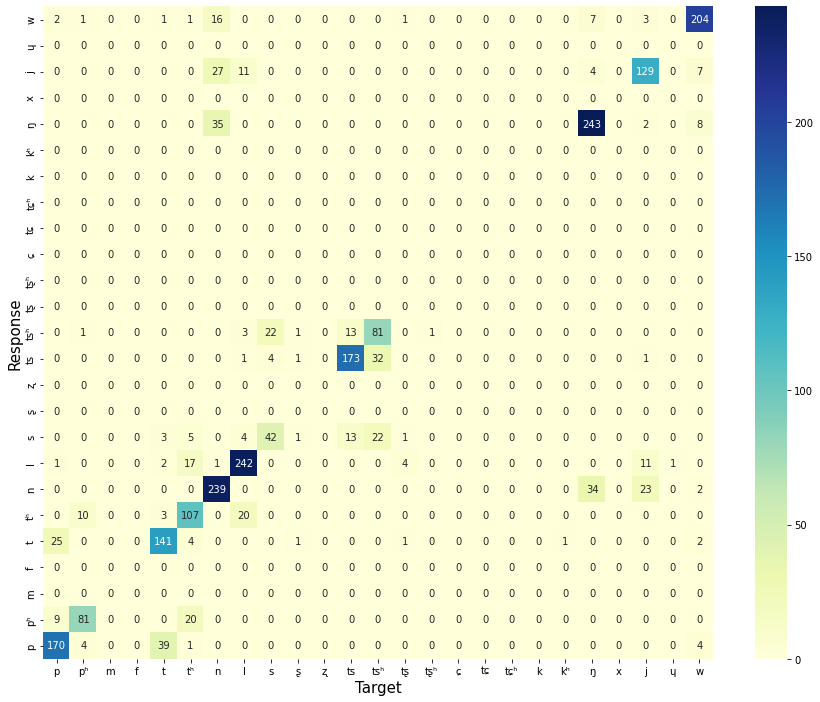

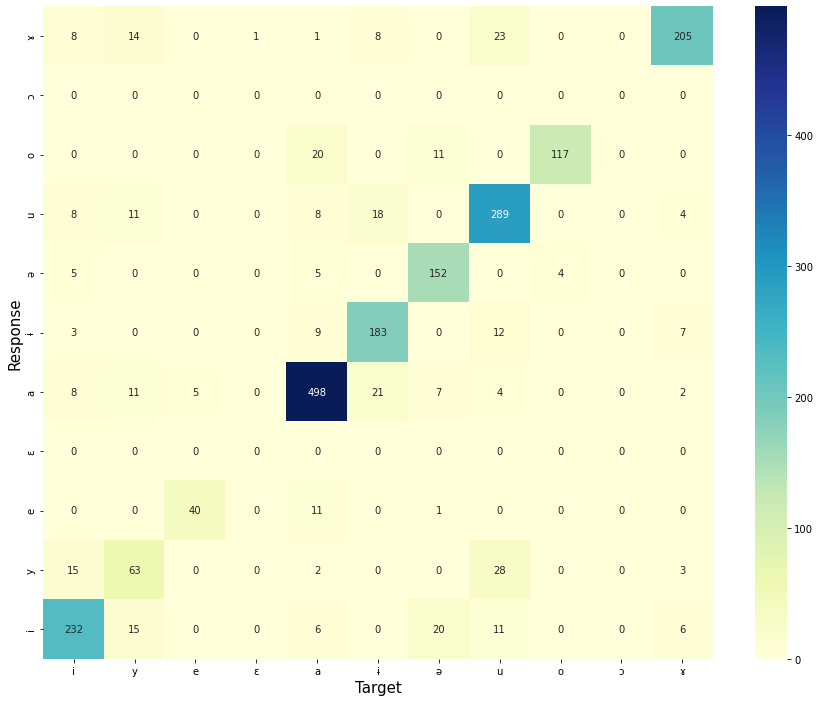

In [12]:
#sorted_consonent = sorted(consonent, key=len, reverse=True)
#print(sorted_consonent)

#conconf = pd.DataFrame(0, columns=consonent, index=consonent[::-1])
#vowconf = pd.DataFrame(0, columns=vowel, index=vowel[::-1])

#print(pnconf)

def split_items(val):
    ans = []
    for t in target:
        tl = t.split('-')
        ttl = [x.split(' ') for x in tl]
        ans.append(ttl)
    return ans

def phoneme_calc(df):
    conconf = pd.DataFrame(0, columns=consonent, index=consonent[::-1])
    vowconf = pd.DataFrame(0, columns=vowel, index=vowel[::-1])

    tg = df['Target'].to_list()
    #print("Target", tg)


    for t in title:
        #print(t)
        ans = df[t].to_list()
        idx = 1
        for it, ia in zip(tg, ans):
            idx = idx + 1
            lit = it.split('-')
            lia = ia.split('-')
            for ilit, ilia in zip(lit, lia):
                ts= ilit.split(' ')
                xs = ilia.split(' ')
                for its, ixs in zip(ts, xs):
                    if its in fsound and ixs in fsound:
                        fsconf.loc[its][ixs] =fsconf.loc[its][ixs]+1
                    else:
                        lits = phoneme_analysis(its)
                        lixs = phoneme_analysis(ixs)

                        if lits != lixs and lixs != ['x']:
                            ldist = LD(lits, lixs)
                            if (ldist > 1):
                                dist, backtrace = wf(lits, lixs)
                                bidx = naive_backtrace(backtrace)
                                a,b,o = align(lits, lixs, bidx)
                                #print(lits, lixs, o)
                            #if dist > 1:
                            #    print(lits, lixs, "editing distance: ", dist)

                        if len(lits) != len(lixs):
                            if (lixs[0] != 'x'):
                                print("len diff:", lits, lixs)
                            break;
    #                        lixs.extend(['_'] * (len(lits)-len(lixs)))
    #                    elif len(lits) < len(lixs):
    #                        lits.extend(['_'] * (len(lixs)-len(lits)))
                        else:
                            #print(lits, lixs)
                            for ilits, ilixs in zip(lits, lixs):
                                if ilixs == 'x':
                                    break
                                elif ilits != ilixs:
                                    #print("Diff[", t, idx, ']', ilits, ilixs)
                                    if ilits in consonent and ilixs in consonent:
                                        conconf.loc[ilits][ilixs] = conconf.loc[ilits][ilixs] +1
                                    elif ilits in vowel and ilixs in vowel:
                                        vowconf.loc[ilits][ilixs] = vowconf.loc[ilits][ilixs] +1
                                    else:
                                        #print("location: [", t, idx, "], Error in matching", ilits, ilixs, lits, lixs)
                                        continue
                                        #print(its, ixs)
                                        #print(LD(its, ixs))
                                else:
                                    if ilits in consonent:
                                        conconf.loc[ilits][ilixs] = conconf.loc[ilits][ilixs] +1
                                    elif ilits in vowel:
                                        vowconf.loc[ilits][ilixs] = vowconf.loc[ilits][ilixs] +1
                                    else:
                                        print("Unknown match")
                                        
    return conconf, vowconf
                                        
c, v = phoneme_calc(df0)
plot_conf(c,v)
print("----")
c, v =phoneme_calc(df1)
plot_conf(c,v)

In [10]:
print(ts, xs, lits, lixs)

NameError: name 'ts' is not defined

In [11]:
for (columnName, columnData) in df0.iteritems():
    if columnName == 'Target':
        target = columnData.values
        targetlist = split_items(target)
        #print(targetlist)
    elif columnName == '測試項目':
        continue
    else:
        print(columnName)
        tstr=columnName
        tstrans = columnData.values
        anslist = split_items(tstrans)
        #print(anslist)
        
        for t, a in zip(targetlist, anslist):
            for it, ia in zip(t, a):
                for tit, aia in zip(it, ia):
                    #if tit != aia:
                    print("Target=", tit, "Ans=", aia)
                
        
            
            #fttl = [val for sublist in tl for val in sublist]
        #ans = target.strip().replace(' ','-').split('-')
        #print(ans)
#    print('Colunm Name : ', columnName)
#    print('Column Contents : ', columnData.values)


f測試項目


NameError: name 'target' is not defined

In [12]:
print(index)

17


In [13]:
#x=phoneme_analysis('waŋ')
#print(x)
 
xx = "wən  pəŋ  oŋ  pən  wən  toŋ  oŋ  təŋ in  pən  ən  pin  in  təŋ  wən  tiŋ u  pʰa  wa  pʰu  u  tʰan  an  tʰu iŋ  lɤ  ɤ liŋ  i  tʰɤ  ɤ  tʰi an  paŋ  aŋ  pan  aj  taw  aw  taj ow  pʰan  an  pʰow  ow  tʰa  a  tʰow wej  paj  aj  pej  wej  tan  an  twej i  pʰu  u  pʰi  i  tʰu  u  tʰi tsɨ  tsʰa  tsa  tsʰɨ  tsɨ  sa  tsa  sɨ y  lu  u  ly  ly  u  lu  y tsu  tsʰɨ  tsɨ  tsʰu  tsu  sɨ  tsɨ  su i  ly  y  li  liŋ  y  ly  iŋ u  lɤ  ɤ  lu  u  tʰɤ  ɤ  tʰu y  la  ja  ly  ly  ja  la  y i  pa  ja  pi  iŋ  tan  an  tiŋ y  lɤ  ɤ ly  ly  ɤ  lɤ  y jow  paw  aŋ  pəŋ  oŋ  taŋ  waŋ  toŋ tsɨ  tsʰɤ  tsɤ  tsʰɨ  tsɨ  sɤ  tsɤ  sɨ"

xxx = xx.replace('  ', ' ')
xlist = xxx.split(' ')
#print(xlist)

for x in xlist:
    print(x, end=' ')
    xp = phoneme_analysis(x)
    print(xp)

wən ['w', 'ə', 'n']
pəŋ ['p', 'ə', 'ŋ']
oŋ ['o', 'ŋ']
pən ['p', 'ə', 'n']
wən ['w', 'ə', 'n']
toŋ ['t', 'o', 'ŋ']
oŋ ['o', 'ŋ']
təŋ ['t', 'ə', 'ŋ']
in ['i', 'n']
pən ['p', 'ə', 'n']
ən ['ə', 'n']
pin ['p', 'i', 'n']
in ['i', 'n']
təŋ ['t', 'ə', 'ŋ']
wən ['w', 'ə', 'n']
tiŋ ['t', 'i', 'ŋ']
u ['u']
pʰa ['pʰ', 'a']
wa ['w', 'a']
pʰu ['pʰ', 'u']
u ['u']
tʰan ['tʰ', 'a', 'n']
an ['a', 'n']
tʰu ['tʰ', 'u']
iŋ ['i', 'ŋ']
lɤ ['l', 'ɤ']
ɤ ['ɤ']
liŋ ['l', 'i', 'ŋ']
i ['i']
tʰɤ ['tʰ', 'ɤ']
ɤ ['ɤ']
tʰi ['tʰ', 'i']
an ['a', 'n']
paŋ ['p', 'a', 'ŋ']
aŋ ['a', 'ŋ']
pan ['p', 'a', 'n']
aj ['a', 'j']
taw ['t', 'a', 'w']
aw ['a', 'w']
taj ['t', 'a', 'j']
ow ['o', 'w']
pʰan ['pʰ', 'a', 'n']
an ['a', 'n']
pʰow ['pʰ', 'o', 'w']
ow ['o', 'w']
tʰa ['tʰ', 'a']
a ['a']
tʰow ['tʰ', 'o', 'w']
wej ['w', 'e', 'j']
paj ['p', 'a', 'j']
aj ['a', 'j']
pej ['p', 'e', 'j']
wej ['w', 'e', 'j']
tan ['t', 'a', 'n']
an ['a', 'n']
twej ['t', 'w', 'e', 'j']
i ['i']
pʰu ['pʰ', 'u']
u ['u']
pʰi ['pʰ', 'i']
i ['i']
tʰu ['tʰ', 'u'

In [14]:
import numpy as np

count = 0
df1len=28
df2len=19
cres = pd.DataFrame(0, index=np.arange(start=1, stop=df1len), columns=title)
vres = pd.DataFrame(0, index=np.arange(start=1, stop=df1len), columns=title)
fres = pd.DataFrame(0, index=np.arange(start=1, stop=df1len), columns=title)
cres.head


<bound method NDFrame.head of     F1  F2  F3  F4  F5  F6  F7  F8  F9  F10  ...  F12  F13  M1  M2  M3  M5  \
1    0   0   0   0   0   0   0   0   0    0  ...    0    0   0   0   0   0   
2    0   0   0   0   0   0   0   0   0    0  ...    0    0   0   0   0   0   
3    0   0   0   0   0   0   0   0   0    0  ...    0    0   0   0   0   0   
4    0   0   0   0   0   0   0   0   0    0  ...    0    0   0   0   0   0   
5    0   0   0   0   0   0   0   0   0    0  ...    0    0   0   0   0   0   
6    0   0   0   0   0   0   0   0   0    0  ...    0    0   0   0   0   0   
7    0   0   0   0   0   0   0   0   0    0  ...    0    0   0   0   0   0   
8    0   0   0   0   0   0   0   0   0    0  ...    0    0   0   0   0   0   
9    0   0   0   0   0   0   0   0   0    0  ...    0    0   0   0   0   0   
10   0   0   0   0   0   0   0   0   0    0  ...    0    0   0   0   0   0   
11   0   0   0   0   0   0   0   0   0    0  ...    0    0   0   0   0   0   
12   0   0   0   0   0   0   0   0

In [15]:
for t in title:
    for index, row in df1.iterrows():
        ans = row['Target'].strip().replace(' ','-').split('-')
        print('ANS=', ans)
        print('Row', index+2, ' ------------------------------------')
        for t in title:
            f1ans = row[t].strip().replace(' ','-').split('-')
            print(t, end = " ")
            for a, b in zip(ans, f1ans):
                if a != b:
                    print('[',a, b,']', end=" ")
                    if b == 'x':
                        count = count + 1
            print()
        
print(count)

ANS= ['wən', '51', 'pəŋ', '51', 'oŋ', '51', 'pən', '51', 'wən', '51', 'toŋ', '51', 'oŋ', '51', 'təŋ', '51']
Row 2  ------------------------------------
F1 [ pən wən ] [ toŋ pən ] [ oŋ x ] [ 51 y ] [ təŋ x ] [ 51 y ] 
F2 [ pəŋ pən ] [ wən x ] [ 51 y ] [ toŋ x ] [ 51 y ] [ oŋ x ] [ 51 y ] [ təŋ x ] [ 51 y ] 
F3 [ oŋ tən ] [ wən tʰəŋ ] [ 51 35 ] 
F4 [ wən woŋ ] [ pəŋ pən ] [ oŋ pən ] [ pən woŋ ] [ wən woŋ ] [ oŋ pən ] [ təŋ x ] [ 51 y ] 
F5 [ pəŋ təŋ ] [ wən x ] [ 51 y ] [ toŋ x ] [ 51 y ] 
F6 [ pən təŋ ] [ wən x ] [ 51 y ] [ toŋ x ] [ 51 y ] [ oŋ x ] [ 51 y ] [ təŋ x ] [ 51 y ] 
F7 [ pəŋ pən ] [ oŋ wən ] [ toŋ pən ] 
F8 [ pəŋ təŋ ] [ pən təŋ ] [ wən pən ] [ toŋ təŋ ] 
F9 [ oŋ wən ] [ toŋ tən ] [ təŋ pən ] 
F10 [ təŋ pəŋ ] 
F11 [ oŋ wən ] [ oŋ wən ] 
F12 [ pəŋ u ] [ toŋ tan ] [ təŋ ta ] 
F13 [ pəŋ pən ] [ pən təŋ ] [ toŋ pən ] 
M1 [ pən x ] [ 51 y ] [ wən i ] [ 51 55 ] [ oŋ x ] [ 51 y ] [ təŋ x ] [ 51 y ] 
M2 [ wən poŋ ] [ pəŋ pu ] [ oŋ tʂa ] [ pən lu ] [ wən tʂan ] [ toŋ lu ] [ oŋ tan ] 

F3 [ ly lu ] [ ly x ] [ 51 y ] [ u x ] [ 51 y ] [ lu x ] [ 51 y ] [ y x ] [ 51 y ] 
F4 [ ly lu ] [ lu ly ] 
F5 [ u x ] [ 51 y ] [ ly x ] [ 51 y ] [ u y ] 
F6 [ ly y ] [ lu x ] [ 51 y ] [ y x ] [ 51 y ] 
F7 [ ly y ] [ ly u ] [ u y ] [ lu y ] [ y lu ] 
F8 [ y i ] [ u lu ] [ u lu ] [ lu x ] [ 51 y ] [ y x ] [ 51 y ] 
F9 [ ly lu ] [ ly y ] [ u lu ] 
F10 [ y ly ] [ lu u ] [ lu ly ] 
F11 [ ly y ] [ u lu ] [ lu u ] [ y ly ] 
F12 [ ly lu ] [ ly y ] [ lu y ] [ y yu ] 
F13 [ y u ] [ u ly ] [ ly lu ] [ ly u ] [ u lu ] [ lu ly ] [ y lu ] 
M1 [ y ly ] [ lu u ] [ ly u ] [ u lu ] [ lu x ] [ 51 y ] [ y x ] [ 51 y ] 
M2 [ y i ] [ lu u ] [ u lu ] [ ly u ] [ ly lu ] 
M3 [ ly y ] [ u ly ] [ lu ly ] 
M5 [ lu ly ] [ ly i ] [ 51 55 ] [ u li ] [ lu ly ] [ y lu ] [ 51 55 ] 
M6 [ lu ly ] [ y u ] 
M7 [ ly lu ] [ ly y ] [ u lu ] 
M8 [ ly lu ] [ ly y ] [ u lɤ ] [ lu lɤ ] 
M9 [ ly y ] [ u lu ] [ lu u ] [ y ly ] 
ANS= ['tsu', '55', 'tsʰɨ', '55', 'tsɨ', '55', 'tsʰu', '55', 'tsu', '55', 'sɨ', '55', 'tsɨ', '55', 'su', 

F8 [ tsʰɨ tsʰɤ ] [ sɤ tsɨ ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
F9 [ tsɨ sɨ ] [ sɤ sɨ ] 
F10 [ sɤ tsʰɨ ] [ tsɤ u ] [ 51 21 ] [ sɨ tsʰɨ ] 
F11 [ tsɤ lɤ ] [ tsʰɨ tsɨ ] [ tsɤ ɤ ] [ sɨ tsɨ ] 
F12 [ tsɤ tsɨ ] [ tsʰɨ sɨ ] [ tsɤ tsɨ ] [ sɨ lɤ ] 
F13 [ tsɤ tsʰɤ ] [ tsʰɨ sɨ ] [ tsɤ sɤ ] [ sɨ tsɨ ] 
M1 [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
M2 [ tsɤ ja ] [ 51 21 ] [ tsʰɨ tsʰɤ ] [ tsɨ paj ] [ 51 35 ] [ sɤ tʰu ] [ tsɤ x ] [ 51 y ] [ sɨ tʰu ] [ 51 55 ] 
M3 [ tsɨ tsʰɨ ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
M5 [ tsʰɤ li ] [ tsɤ tsʰɤ ] [ tsʰɨ ʂɨ ] [ tsɨ tsʰɤ ] [ sɤ li ] [ tsɤ tsʰɤ ] [ sɨ ʂɨ ] 
M6 [ tsʰɨ tsɨ ] [ tsɨ tsʰɨ ] [ sɤ lɤ ] [ sɨ tsʰɨ ] 
M7 [ tsʰɤ sɤ ] [ tsʰɨ la ] [ tsɨ tsʰɤ ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
M8 [ tsɨ ɤ ] [ tsʰɤ sɨ ] [ tsɤ tsɨ ] [ tsʰɨ sɨ ] [ tsɨ ɤ ] [ sɤ x ] [ 51 y ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
M9 [ tsɤ ɤ ] [ tsʰɨ sɨ ] [ tsɤ ɤ ] [ sɨ tiŋ ] [ 51 55 ] 
ANS= ['wən', '51', 'pəŋ', '51', 'oŋ', '51', 'pən', '51', 'wən', '51', 'toŋ', '51', 'oŋ', '51', 'təŋ', '51']
Row

F2 [ tsɨ an ] [ tsʰa tsa ] [ tsʰɨ an ] [ tsɨ i ] [ sa tsa ] [ sɨ i ] 
F3 [ tsa tsɨ ] [ sa tʰa ] [ tsa tsɨ ] [ sɨ i ] 
F4 [ 55 21 ] [ 55 35 ] 
F5 [ tsɨ tsʰɨ ] [ tsɨ x ] [ 55 y ] [ sa x ] [ 55 y ] [ tsa x ] [ 55 y ] [ sɨ x ] [ 55 y ] 
F6 [ tsa tsʰa ] [ tsʰɨ tsɨ ] [ tsa x ] [ 55 y ] [ sɨ x ] [ 55 y ] 
F7 [ tsʰa tsʰɨ ] [ tsa tsʰɨ ] [ tsɨ tsʰɨ ] [ sa x ] [ 55 y ] [ tsa tsɨ ] [ sɨ tsa ] 
F8 [ tsɨ x ] [ 55 y ] [ sa x ] [ 55 y ] [ tsa x ] [ 55 y ] [ sɨ x ] [ 55 y ] 
F9 [ tsʰɨ sɨ ] [ sa tsʰa ] 
F10 [ sɨ tsɨ ] 
F11 [ tsʰɨ tsɨ ] [ sa tsʰa ] [ sɨ tsɨ ] 
F12 [ tsʰa tsʰɨ ] [ tsa tsɨ ] [ tsʰɨ sa ] [ sa tsʰɨ ] [ tsa tsɨ ] [ sɨ sa ] [ 55 21 ] 
F13 [ tsa ʂa ] [ tsʰɨ sɨ ] [ sa tsʰa ] 
M1 [ tsa tsɨ ] [ tsʰɨ sɨ ] [ sa x ] [ 55 y ] [ tsa an ] [ sɨ tsa ] [ 55 35 ] 
M2 [ tsa tsɨ ] [ tsʰɨ tsʰa ] [ sa sɨ ] [ tsa tsɨ ] [ sɨ tsʰɨ ] 
M3 [ tsa tsʰa ] [ tsʰɨ sɨ ] [ sa tsʰɨ ] 
M5 [ tsʰa pʰi ] [ sa ti ] [ tsa tsɨ ] [ sɨ ta ] 
M6 [ tsa tsʰa ] [ tsʰɨ tsɨ ] [ sa san ] [ 55 51 ] [ tsa tsɨ ] 
M7 [ tsʰɨ sɨ ] [ tsɨ tsa ] [ s

F10 [ sɤ tsʰɨ ] [ tsɤ u ] [ 51 21 ] [ sɨ tsʰɨ ] 
F11 [ tsɤ lɤ ] [ tsʰɨ tsɨ ] [ tsɤ ɤ ] [ sɨ tsɨ ] 
F12 [ tsɤ tsɨ ] [ tsʰɨ sɨ ] [ tsɤ tsɨ ] [ sɨ lɤ ] 
F13 [ tsɤ tsʰɤ ] [ tsʰɨ sɨ ] [ tsɤ sɤ ] [ sɨ tsɨ ] 
M1 [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
M2 [ tsɤ ja ] [ 51 21 ] [ tsʰɨ tsʰɤ ] [ tsɨ paj ] [ 51 35 ] [ sɤ tʰu ] [ tsɤ x ] [ 51 y ] [ sɨ tʰu ] [ 51 55 ] 
M3 [ tsɨ tsʰɨ ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
M5 [ tsʰɤ li ] [ tsɤ tsʰɤ ] [ tsʰɨ ʂɨ ] [ tsɨ tsʰɤ ] [ sɤ li ] [ tsɤ tsʰɤ ] [ sɨ ʂɨ ] 
M6 [ tsʰɨ tsɨ ] [ tsɨ tsʰɨ ] [ sɤ lɤ ] [ sɨ tsʰɨ ] 
M7 [ tsʰɤ sɤ ] [ tsʰɨ la ] [ tsɨ tsʰɤ ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
M8 [ tsɨ ɤ ] [ tsʰɤ sɨ ] [ tsɤ tsɨ ] [ tsʰɨ sɨ ] [ tsɨ ɤ ] [ sɤ x ] [ 51 y ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
M9 [ tsɤ ɤ ] [ tsʰɨ sɨ ] [ tsɤ ɤ ] [ sɨ tiŋ ] [ 51 55 ] 
ANS= ['wən', '51', 'pəŋ', '51', 'oŋ', '51', 'pən', '51', 'wən', '51', 'toŋ', '51', 'oŋ', '51', 'təŋ', '51']
Row 2  ------------------------------------
F1 [ pən wən ] [ toŋ pən ] [ oŋ x ] [ 51 y ] [ təŋ

F6 [ pʰi pi ] [ u x ] [ 55 y ] [ tʰi x ] [ 55 y ] 
F7 [ u wɔ ] [ i wɔ ] [ tʰu pʰu ] [ u x ] [ 55 y ] [ tʰi x ] [ 55 y ] 
F8 [ u tʰi ] [ tʰi x ] [ 55 y ] 
F9 [ pʰu tʰu ] 
F10 [ tʰu pʰu ] 
F11 [ pʰu tʰu ] [ pʰi pi ] [ tʰi tʰu ] 
F12 [ pʰi tʰa ] [ tʰi tʰa ] 
F13 [ pʰu tʰu ] [ pʰi tʰi ] [ i u ] [ tʰu tʰi ] [ tʰi pʰən ] 
M1 [ pʰi tʰi ] [ i x ] [ 55 y ] [ tʰu x ] [ 55 y ] [ u x ] [ 55 y ] [ tʰi x ] [ 55 y ] 
M2 [ 55 21 ] [ pʰi pʰa ] [ tʰu pʰu ] [ u njaw ] [ 55 21 ] [ tʰi tʰu ] 
M3 
M5 [ pʰu pʰi ] [ pʰi tʰi ] [ u x ] [ 55 y ] [ tʰi x ] [ 55 y ] 
M6 [ u i ] [ tʰi tʰu ] 
M7 [ pʰi tʰi ] [ i u ] [ tʰu pʰu ] 
M8 [ u tʰu ] [ tʰi x ] [ 55 y ] 
M9 [ pʰi i ] [ i u ] [ tʰu pʰu ] [ u i ] 
ANS= ['tsɨ', '55', 'tsʰa', '55', 'tsa', '55', 'tsʰɨ', '55', 'tsɨ', '55', 'sa', '55', 'tsa', '55', 'sɨ', '55']
Row 10  ------------------------------------
F1 [ tsa tsɨ ] [ tsɨ x ] [ 55 y ] [ sa x ] [ 55 y ] [ tsa x ] [ 55 y ] [ sɨ x ] [ 55 y ] 
F2 [ tsɨ an ] [ tsʰa tsa ] [ tsʰɨ an ] [ tsɨ i ] [ sa tsa ] [ sɨ i ] 
F3 [ 

M7 [ lɤ tʂu ] [ ɤ u ] [ 35 51 ] [ ly ɤ ] [ ɤ y ] [ lɤ y ] [ y ly ] 
M8 [ y x ] [ 51 y ] [ lɤ x ] [ 55 y ] [ 35 51 ] 
M9 [ lɤ ly ] [ 55 51 ] [ ɤ y ] [ 35 51 ] [ ly li ] [ ly y ] [ ɤ li ] [ y ly ] 
ANS= ['jow', '55', 'paw', '55', 'aŋ', '55', 'pəŋ', '21', 'oŋ', '55', 'taŋ', '55', 'waŋ', '55', 'toŋ', '55']
Row 18  ------------------------------------
F1 [ aŋ x ] [ 55 y ] [ pəŋ x ] [ 21 y ] [ oŋ x ] [ 55 y ] [ taŋ x ] [ 55 y ] 
F2 [ aŋ waŋ ] [ 21 55 ] [ oŋ x ] [ 55 y ] [ taŋ x ] [ 55 y ] 
F3 [ jow oŋ ] [ paw paŋ ] [ aŋ ja ] [ pəŋ x ] [ 21 y ] [ oŋ i ] [ taŋ x ] [ 55 y ] [ waŋ x ] [ 55 y ] [ toŋ x ] [ 55 y ] 
F4 [ 21 55 ] 
F5 [ aŋ x ] [ 55 y ] [ pəŋ x ] [ 21 y ] [ oŋ waŋ ] [ taŋ tan ] 
F6 [ jow i ] [ aŋ jaŋ ] [ 21 55 ] [ toŋ twɔ ] 
F7 [ aŋ ja ] [ pəŋ an ] [ 21 55 ] [ oŋ waŋ ] [ waŋ x ] [ 55 y ] [ toŋ x ] [ 55 y ] 
F8 [ pəŋ təŋ ] [ 21 55 ] [ oŋ x ] [ 55 y ] [ taŋ x ] [ 55 y ] [ waŋ aŋ ] [ toŋ təŋ ] 
F9 [ 21 55 ] [ oŋ waŋ ] [ waŋ jaŋ ] 
F10 [ paw paŋ ] [ aŋ an ] [ 21 55 ] [ oŋ an ] [ taŋ paŋ ]

F2 [ pej wej ] [ wej an ] [ tan wej ] [ an x ] [ 55 y ] [ twej x ] [ 55 y ] 
F3 [ paj paŋ ] [ aj aŋ ] [ pej paŋ ] [ wej a ] [ tan i ] [ an a ] 
F4 [ wej aj ] [ tan tʰwan ] 
F5 [ pej x ] [ 55 y ] [ wej x ] [ 55 y ] [ an x ] [ 55 y ] [ twej x ] [ 55 y ] 
F6 [ aj an ] [ tan x ] [ 55 y ] [ an x ] [ 55 y ] [ twej x ] [ 55 y ] 
F7 [ aj an ] [ wej wɔ ] [ tan paj ] [ twej pej ] 
F8 [ paj pej ] [ aj an ] [ pej tan ] [ tan pej ] [ an x ] [ 55 y ] [ twej x ] [ 55 y ] 
F9 [ wej waj ] [ aj waj ] [ pej twej ] [ wej an ] [ tan twej ] [ an aj ] [ twej wej ] 
F10 [ paj pan ] [ pej twej ] [ tan taj ] 
F11 [ paj pʰa ] [ aj an ] [ pej tan ] [ tan paj ] [ twej tan ] 
F12 [ paj pa ] [ aj an ] [ pej tʰa ] [ tan tʰa ] [ an wej ] [ twej sa ] 
F13 [ paj tʰa ] [ pej pʰən ] [ tan tʰa ] [ twej taj ] 
M1 [ paj an ] [ aj an ] [ tan pej ] [ an x ] [ 55 y ] [ twej x ] [ 55 y ] 
M2 [ wej waj ] [ pej paj ] [ wej waj ] [ tan taj ] [ an aj ] [ twej taj ] 
M3 [ pej twej ] [ tan paj ] [ an aj ] 
M5 [ paj pʰan ] [ pej tʰaw ]

M2 [ ja i ] [ iŋ i ] [ tan tʂan ] [ an i ] 
M3 
M5 [ pa pi ] [ ja jaŋ ] [ pi taŋ ] [ an ja ] 
M6 
M7 [ iŋ u ] [ 55 51 ] [ tan ly ] [ 55 51 ] [ an pa ] 
M8 [ ja i ] [ pi u ] [ iŋ u ] [ tan pi ] 
M9 [ iŋ i ] [ tan paj ] [ an aj ] 
ANS= ['y', '51', 'lɤ', '55', 'ɤ', '35', 'ly', '51', 'ly', '51', 'ɤ', '51', 'lɤ', '51', 'y', '51']
Row 17  ------------------------------------
F1 [ 35 51 ] [ ly y ] [ ly x ] [ 51 y ] [ ɤ x ] [ 51 y ] [ lɤ x ] [ 51 y ] [ y x ] [ 51 y ] 
F2 [ lɤ tʂu ] [ 55 51 ] [ 35 51 ] [ ly lu ] [ ɤ y ] [ lɤ ly ] 
F3 [ y u ] [ lɤ tʂu ] [ 55 51 ] [ ɤ y ] [ 35 51 ] [ ly lɤ ] [ ly ɤ ] [ ɤ ly ] [ lɤ x ] [ 51 y ] [ y x ] [ 51 y ] 
F4 [ 35 51 ] 
F5 [ 35 51 ] [ ɤ x ] [ 51 y ] [ lɤ x ] [ 51 y ] [ y x ] [ 51 y ] 
F6 [ y i ] [ 35 51 ] [ lɤ x ] [ 51 y ] [ y x ] [ 51 y ] 
F7 [ 35 51 ] [ ly y ] [ ly y ] [ ɤ ly ] [ lɤ i ] [ y ɤ ] 
F8 [ 35 51 ] [ lɤ ly ] [ y lɤ ] 
F9 [ 35 51 ] [ ly tʰu ] [ ly y ] [ ɤ y ] 
F10 [ ɤ lɤ ] [ 35 51 ] [ ly y ] [ ly y ] [ ɤ lɤ ] [ lɤ ɥɛ ] 
F11 [ 35 51 ] [ ly y ] [ ɤ 

F13 [ paŋ lɤ ] [ 55 51 ] [ aŋ aw ] [ pan pʰən ] [ 55 51 ] [ aj an ] [ taw tʰɤ ] [ 55 51 ] [ aw in ] [ taj tʰɤ ] [ 55 51 ] 
M1 [ aŋ an ] [ pan paŋ ] [ aj an ] [ aw x ] [ 55 y ] [ taj x ] [ 55 y ] 
M2 [ paŋ pən ] [ aŋ x ] [ 55 y ] [ pan x ] [ 55 y ] [ aj taw ] [ taw tʰu ] [ aw x ] [ 55 y ] [ taj x ] [ 55 y ] 
M3 [ pan paŋ ] [ aw aŋ ] 
M5 [ pan tan ] [ aj an ] [ taw tu ] [ aw an ] [ taj twɔ ] [ 55 21 ] 
M6 [ paŋ tan ] [ pan paŋ ] [ aj an ] [ aw an ] 
M7 [ aŋ ən ] [ pan taj ] [ aj aw ] [ taw tʰɤ ] [ aw an ] 
M8 [ aŋ an ] [ pan təŋ ] [ aj an ] 
M9 [ an ən ] [ aŋ an ] [ pan taŋ ] [ aj an ] [ aw an ] [ taj tʰu ] 
ANS= ['ow', '55', 'pʰan', '55', 'an', '55', 'pʰow', '55', 'ow', '55', 'tʰa', '55', 'a', '55', 'tʰow', '55']
Row 7  ------------------------------------
F1 [ ow an ] [ pʰan paŋ ] [ an x ] [ 55 y ] [ pʰow x ] [ 55 y ] [ a x ] [ 55 y ] [ tʰow x ] [ 55 y ] 
F2 [ ow x ] [ 55 y ] [ pʰan x ] [ 55 y ] [ an x ] [ 55 y ] [ pʰow x ] [ 55 y ] [ ow x ] [ 55 y ] [ tʰa ow ] [ a tʰa ] [ tʰow tʰa ] 


F1 [ ja x ] [ 51 y ] [ ly x ] [ 51 y ] [ la x ] [ 51 y ] [ y x ] [ 51 y ] 
F2 [ ja y ] [ ja y ] [ la y ] [ y tʰu ] 
F3 [ y u ] [ ly y ] [ ly y ] [ ja lu ] [ la ɤ ] [ y tʰu ] 
F4 [ ly y ] [ ly y ] [ ja la ] [ la ja ] 
F5 [ la lɤ ] [ ja lɤ ] [ ly x ] [ 51 y ] [ ly y ] [ ja ly ] [ la x ] [ 51 y ] [ y x ] [ 51 y ] 
F6 [ y i ] [ ja x ] [ 51 y ] [ ly x ] [ 51 y ] 
F7 [ ja ly ] [ ly y ] [ ly y ] [ la y ] [ y lɤ ] 
F8 [ la ly ] [ ja ly ] [ ly ja ] [ ly ɤ ] [ ja ly ] [ la x ] [ 51 y ] [ y x ] [ 51 y ] 
F9 [ y ly ] [ la ja ] 
F10 [ ja la ] [ ly y ] [ la ja ] [ y ly ] 
F11 [ 51 35 ] [ la ja ] [ y ly ] 
F12 [ ja y ] [ ja la ] [ la ly ] [ y ja ] 
F13 [ ja lja ] [ ly tʰi ] [ ly y ] [ ja lja ] [ la ja ] 
M1 [ la ja ] [ 51 35 ] [ ly x ] [ 51 y ] [ ja x ] [ 51 y ] 
M2 [ y i ] [ ja u ] [ ly la ] [ ly li ] [ ja ly ] [ la x ] [ 51 y ] [ y x ] [ 51 y ] 
M3 [ ly tʰu ] [ ly y ] 
M5 [ la ly ] [ ly li ] [ ly y ] [ ja ly ] [ la ja ] [ 51 55 ] [ y li ] 
M6 [ la ja ] 
M7 [ la ly ] [ ja y ] [ la u ] [ y ly ] 
M8 [

F6 [ i iŋ ] [ ɤ x ] [ 51 y ] [ tʰi x ] [ 51 y ] 
F7 [ liŋ tʰi ] [ i iŋ ] [ ɤ iŋ ] 
F8 [ iŋ i ] [ lɤ pi ] [ liŋ ləŋ ] [ i ɤ ] [ tʰɤ təŋ ] [ ɤ x ] [ 51 y ] [ tʰi x ] [ 51 y ] 
F9 [ liŋ li ] [ ɤ i ] [ tʰi lin ] 
F10 
F11 [ i ʂɨ ] [ tʰi lin ] 
F12 [ lɤ lən ] [ liŋ tʰɤ ] [ tʰɤ lɤ ] [ ɤ i ] [ tʰi lən ] 
F13 [ iŋ i ] [ lɤ nən ] [ liŋ lən ] [ i iŋ ] [ ɤ ən ] [ tʰi tʰɤ ] 
M1 [ iŋ i ] [ 51 55 ] [ lɤ noŋ ] [ 51 55 ] [ ɤ i ] [ 35 51 ] [ liŋ nən ] [ i nən ] [ tʰɤ tʰi ] [ ɤ x ] [ 51 y ] [ tʰi x ] [ 51 y ] 
M2 [ liŋ lɤ ] [ i tʰɤ ] [ tʰɤ lɤ ] [ ɤ sɨ ] [ tʰi lɤ ] 
M3 [ liŋ tʰi ] [ tʰɤ lɤ ] 
M5 [ lɤ lin ] [ liŋ təŋ ] [ i x ] [ 51 y ] [ tʰɤ x ] [ 51 y ] [ ɤ x ] [ 51 y ] [ tʰi x ] [ 51 y ] 
M6 [ i in ] [ tʰɤ lin ] [ ɤ lɤ ] [ tʰi lin ] 
M7 [ i liŋ ] [ tʰi tʰɤ ] 
M8 [ ɤ iŋ ] [ 35 51 ] [ liŋ tʰɤ ] [ i liŋ ] [ tʰi tʰɤ ] 
M9 [ liŋ ɤ ] [ ɤ ən ] [ tʰi tʰɤ ] 
ANS= ['an', '55', 'paŋ', '55', 'aŋ', '55', 'pan', '55', 'aj', '55', 'taw', '55', 'aw', '55', 'taj', '55']
Row 6  ------------------------------------
F1 [ p

F10 [ ly lu ] [ y ly ] [ li y ] [ liŋ li ] [ y lu ] [ iŋ liŋ ] 
F11 [ i tsɨ ] [ y lin ] [ li ly ] [ liŋ ly ] [ ly lin ] [ iŋ y ] 
F12 [ ly lu ] [ li ly ] [ liŋ y ] [ y liŋ ] [ ly y ] [ iŋ ly ] 
F13 [ i y ] [ ly li ] [ y ly ] [ y ly ] [ ly y ] [ iŋ ly ] 
M1 [ i ly ] [ ly in ] [ li ly ] [ liŋ x ] [ 51 y ] [ y x ] [ 51 y ] [ ly x ] [ 51 y ] [ iŋ x ] [ 51 y ] 
M2 [ ly lu ] [ y liŋ ] [ li ly ] [ liŋ li ] [ y ly ] [ iŋ ly ] 
M3 [ i lin ] [ ly lu ] [ liŋ i ] [ y lu ] [ ly y ] [ iŋ li ] 
M5 [ i y ] [ 51 55 ] [ liŋ i ] [ y li ] [ ly u ] [ 51 55 ] [ iŋ lu ] [ 51 55 ] 
M6 [ li ly ] [ liŋ y ] [ ly y ] [ iŋ li ] 
M7 [ ly lu ] [ li ly ] [ liŋ u ] [ y ly ] [ ly ɥən ] [ iŋ ly ] 
M8 [ y i ] [ li ly ] [ liŋ i ] [ y ly ] 
M9 [ ly li ] [ li ly ] [ liŋ y ] [ y ly ] [ ly iŋ ] [ iŋ li ] 
ANS= ['u', '51', 'lɤ', '51', 'ɤ', '51', 'lu', '51', 'u', '51', 'tʰɤ', '51', 'ɤ', '51', 'tʰu', '51']
Row 14  ------------------------------------
F1 [ lɤ tʰɤ ] [ u x ] [ 51 y ] [ tʰɤ x ] [ 51 y ] 
F2 [ ɤ tʰɤ ] 
F3 [ lu tʰu ] 

M3 [ pən təŋ ] [ ən wən ] [ pin təŋ ] [ təŋ tiŋ ] [ wən ən ] 
M5 [ pən təŋ ] [ ən wən ] [ pin tu ] [ wən in ] 
M6 [ wən təŋ ] 
M7 [ ən wən ] [ pin tiŋ ] [ in wən ] 
M8 [ pən təŋ ] [ ən wən ] [ pin təŋ ] [ in ən ] 
M9 [ ən wən ] [ pin təŋ ] [ in tiŋ ] 
ANS= ['u', '55', 'pʰa', '55', 'wa', '55', 'pʰu', '55', 'u', '55', 'tʰan', '55', 'an', '55', 'tʰu', '55']
Row 4  ------------------------------------
F1 [ u in ] [ wa u ] [ pʰu pa ] [ an x ] [ 55 y ] [ tʰu x ] [ 55 y ] 
F2 [ u x ] [ 55 y ] [ tʰan x ] [ 55 y ] 
F3 [ wa waŋ ] [ pʰu tiŋ ] [ tʰan i ] [ an x ] [ 55 y ] [ tʰu x ] [ 55 y ] 
F4 
F5 [ pʰu u ] [ an x ] [ 55 y ] [ tʰu x ] [ 55 y ] 
F6 [ pʰu pu ] [ an x ] [ 55 y ] [ tʰu x ] [ 55 y ] 
F7 [ pʰu tʰu ] [ u wa ] [ tʰan pʰa ] 
F8 [ wa x ] [ 55 y ] [ pʰu x ] [ 55 y ] [ u x ] [ 55 y ] [ tʰan x ] [ 55 y ] [ an x ] [ 55 y ] [ tʰu x ] [ 55 y ] 
F9 
F10 [ u an ] [ tʰan tʰu ] [ an tʰan ] 
F11 [ pʰu pʰa ] [ tʰan tʰu ] [ tʰu tʰan ] 
F12 [ 55 51 ] [ wa an ] [ pʰu tʰa ] [ tʰan tʰa ] [ tʰu tʰa ] 
F13 [

F9 [ su tsʰu ] 
F10 [ tsɨ tsʰɨ ] [ tsʰu su ] [ sɨ ən ] [ tsɨ tsʰɨ ] 
F11 [ tsɨ tsʰɨ ] [ tsu tsʰu ] [ sɨ tʰu ] [ su tsʰɨ ] 
F12 [ tsʰu su ] [ sɨ tsʰɨ ] [ su tsʰu ] 
F13 [ tsu tsʰu ] [ tsʰɨ tsɨ ] [ tsɨ tsʰɨ ] [ tsu tsɨ ] [ sɨ tsʰu ] [ tsɨ tsʰu ] [ su tsʰɨ ] 
M1 [ tsu u ] [ 55 51 ] [ tsʰɨ ən ] [ tsu x ] [ 55 y ] [ sɨ x ] [ 55 y ] [ tsɨ x ] [ 55 y ] [ su x ] [ 55 y ] 
M2 [ tsu tsɨ ] [ tsʰɨ tsɨ ] [ tsɨ tsʰɨ ] [ tsʰu tsʰɨ ] [ tsu tsʰɨ ] [ tsɨ tsu ] 
M3 [ tsʰɨ tsɨ ] [ tsɨ tsʰɨ ] [ tsʰu su ] [ tsu tsʰu ] [ sɨ tsɨ ] [ su tsʰu ] 
M5 [ tsu tsɨ ] [ tsʰɨ li ] [ 55 51 ] [ tsʰu su ] [ tsu tsɨ ] [ sɨ li ] [ 55 51 ] [ su tu ] 
M6 [ tsɨ tsʰɨ ] [ tsu tsʰi ] [ su sɨ ] 
M7 [ tsɨ sɨ ] [ tsʰu tsu ] [ tsɨ tsi ] [ su tsʰu ] 
M8 [ tsu tsɨ ] [ tsʰɨ su ] [ tsʰu tsu ] [ sɨ tsɨ ] [ su sɨ ] 
M9 [ tsʰɨ tsʰu ] [ tsʰu sɨ ] [ tsu tsɨ ] [ su sɨ ] 
ANS= ['i', '51', 'ly', '51', 'y', '51', 'li', '51', 'liŋ', '51', 'y', '51', 'ly', '51', 'iŋ', '51']
Row 13  ------------------------------------
F1 [ ly lu ] [ li lu ] [ liŋ li

F6 [ pən təŋ ] [ wən x ] [ 51 y ] [ toŋ x ] [ 51 y ] [ oŋ x ] [ 51 y ] [ təŋ x ] [ 51 y ] 
F7 [ pəŋ pən ] [ oŋ wən ] [ toŋ pən ] 
F8 [ pəŋ təŋ ] [ pən təŋ ] [ wən pən ] [ toŋ təŋ ] 
F9 [ oŋ wən ] [ toŋ tən ] [ təŋ pən ] 
F10 [ təŋ pəŋ ] 
F11 [ oŋ wən ] [ oŋ wən ] 
F12 [ pəŋ u ] [ toŋ tan ] [ təŋ ta ] 
F13 [ pəŋ pən ] [ pən təŋ ] [ toŋ pən ] 
M1 [ pən x ] [ 51 y ] [ wən i ] [ 51 55 ] [ oŋ x ] [ 51 y ] [ təŋ x ] [ 51 y ] 
M2 [ wən poŋ ] [ pəŋ pu ] [ oŋ tʂa ] [ pən lu ] [ wən tʂan ] [ toŋ lu ] [ oŋ tan ] [ təŋ taw ] 
M3 [ pən təŋ ] [ təŋ pən ] 
M5 [ oŋ x ] [ 51 y ] [ təŋ x ] [ 51 y ] 
M6 [ oŋ wən ] 
M7 [ oŋ wa ] [ 51 21 ] [ wən wa ] [ 51 21 ] [ oŋ wa ] [ 51 21 ] [ təŋ pən ] 
M8 [ toŋ təŋ ] [ təŋ pən ] 
M9 [ pən wən ] [ oŋ təŋ ] 
ANS= ['in', '55', 'pən', '55', 'ən', '55', 'pin', '55', 'in', '55', 'təŋ', '55', 'wən', '55', 'tiŋ', '55']
Row 3  ------------------------------------
F1 [ in x ] [ 55 y ] [ təŋ x ] [ 55 y ] [ wən x ] [ 55 y ] [ tiŋ x ] [ 55 y ] 
F2 [ ən si ] [ pin pən ] [ in x ] 

ANS= ['y', '51', 'lu', '51', 'u', '51', 'ly', '51', 'ly', '51', 'u', '51', 'lu', '51', 'y', '51']
Row 11  ------------------------------------
F1 [ u y ] [ ly tʰɤ ] [ ly x ] [ 51 y ] [ 51 55 ] [ lu x ] [ 51 y ] [ y x ] [ 51 y ] 
F2 [ u lu ] [ ly y ] [ ly u ] [ u lu ] [ y u ] 
F3 [ ly lu ] [ ly x ] [ 51 y ] [ u x ] [ 51 y ] [ lu x ] [ 51 y ] [ y x ] [ 51 y ] 
F4 [ ly lu ] [ lu ly ] 
F5 [ u x ] [ 51 y ] [ ly x ] [ 51 y ] [ u y ] 
F6 [ ly y ] [ lu x ] [ 51 y ] [ y x ] [ 51 y ] 
F7 [ ly y ] [ ly u ] [ u y ] [ lu y ] [ y lu ] 
F8 [ y i ] [ u lu ] [ u lu ] [ lu x ] [ 51 y ] [ y x ] [ 51 y ] 
F9 [ ly lu ] [ ly y ] [ u lu ] 
F10 [ y ly ] [ lu u ] [ lu ly ] 
F11 [ ly y ] [ u lu ] [ lu u ] [ y ly ] 
F12 [ ly lu ] [ ly y ] [ lu y ] [ y yu ] 
F13 [ y u ] [ u ly ] [ ly lu ] [ ly u ] [ u lu ] [ lu ly ] [ y lu ] 
M1 [ y ly ] [ lu u ] [ ly u ] [ u lu ] [ lu x ] [ 51 y ] [ y x ] [ 51 y ] 
M2 [ y i ] [ lu u ] [ u lu ] [ ly u ] [ ly lu ] 
M3 [ ly y ] [ u ly ] [ lu ly ] 
M5 [ lu ly ] [ ly i ] [ 51 55 ] [ 

M8 [ aŋ an ] [ pəŋ paw ] [ 21 55 ] 
M9 [ aŋ waŋ ] [ pəŋ taŋ ] [ 21 55 ] [ waŋ iŋ ] [ toŋ taŋ ] 
ANS= ['tsɨ', '51', 'tsʰɤ', '51', 'tsɤ', '51', 'tsʰɨ', '51', 'tsɨ', '51', 'sɤ', '51', 'tsɤ', '51', 'sɨ', '51']
Row 19  ------------------------------------
F1 [ tsɤ x ] [ 51 y ] [ tsʰɨ x ] [ 51 y ] [ tsɤ ɤ ] [ sɨ tʰɤ ] 
F2 [ tsɤ tsʰɤ ] [ tsʰɨ tʂʰɨ ] [ tsɨ tsʰɨ ] [ sɤ tʂɤ ] [ tsɤ tsʰɤ ] [ sɨ sɤ ] 
F3 [ tsɨ tsʰɨ ] [ sɤ tsɤ ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
F4 [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
F5 [ tsɨ tsʰɨ ] [ tsʰɨ tsɨ ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
F6 [ tsɨ x ] [ 51 y ] [ sɤ x ] [ 51 y ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
F7 [ tsʰɨ sɨ ] [ sɤ tsʰɤ ] [ tsɤ tsɨ ] [ sɨ x ] [ 51 y ] 
F8 [ tsʰɨ tsʰɤ ] [ sɤ tsɨ ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
F9 [ tsɨ sɨ ] [ sɤ sɨ ] 
F10 [ sɤ tsʰɨ ] [ tsɤ u ] [ 51 21 ] [ sɨ tsʰɨ ] 
F11 [ tsɤ lɤ ] [ tsʰɨ tsɨ ] [ tsɤ ɤ ] [ sɨ tsɨ ] 
F12 [ tsɤ tsɨ ] [ tsʰɨ sɨ ] [ tsɤ tsɨ ] [ sɨ lɤ ] 
F13 [ tsɤ tsʰɤ ] [ tsʰɨ sɨ ] [ tsɤ sɤ ] [ sɨ tsɨ ] 
M1 [ 

M2 [ 55 21 ] [ pʰi pʰa ] [ tʰu pʰu ] [ u njaw ] [ 55 21 ] [ tʰi tʰu ] 
M3 
M5 [ pʰu pʰi ] [ pʰi tʰi ] [ u x ] [ 55 y ] [ tʰi x ] [ 55 y ] 
M6 [ u i ] [ tʰi tʰu ] 
M7 [ pʰi tʰi ] [ i u ] [ tʰu pʰu ] 
M8 [ u tʰu ] [ tʰi x ] [ 55 y ] 
M9 [ pʰi i ] [ i u ] [ tʰu pʰu ] [ u i ] 
ANS= ['tsɨ', '55', 'tsʰa', '55', 'tsa', '55', 'tsʰɨ', '55', 'tsɨ', '55', 'sa', '55', 'tsa', '55', 'sɨ', '55']
Row 10  ------------------------------------
F1 [ tsa tsɨ ] [ tsɨ x ] [ 55 y ] [ sa x ] [ 55 y ] [ tsa x ] [ 55 y ] [ sɨ x ] [ 55 y ] 
F2 [ tsɨ an ] [ tsʰa tsa ] [ tsʰɨ an ] [ tsɨ i ] [ sa tsa ] [ sɨ i ] 
F3 [ tsa tsɨ ] [ sa tʰa ] [ tsa tsɨ ] [ sɨ i ] 
F4 [ 55 21 ] [ 55 35 ] 
F5 [ tsɨ tsʰɨ ] [ tsɨ x ] [ 55 y ] [ sa x ] [ 55 y ] [ tsa x ] [ 55 y ] [ sɨ x ] [ 55 y ] 
F6 [ tsa tsʰa ] [ tsʰɨ tsɨ ] [ tsa x ] [ 55 y ] [ sɨ x ] [ 55 y ] 
F7 [ tsʰa tsʰɨ ] [ tsa tsʰɨ ] [ tsɨ tsʰɨ ] [ sa x ] [ 55 y ] [ tsa tsɨ ] [ sɨ tsa ] 
F8 [ tsɨ x ] [ 55 y ] [ sa x ] [ 55 y ] [ tsa x ] [ 55 y ] [ sɨ x ] [ 55 y ] 
F9 [ tsʰɨ sɨ ] [ s

F1 [ aŋ x ] [ 55 y ] [ pəŋ x ] [ 21 y ] [ oŋ x ] [ 55 y ] [ taŋ x ] [ 55 y ] 
F2 [ aŋ waŋ ] [ 21 55 ] [ oŋ x ] [ 55 y ] [ taŋ x ] [ 55 y ] 
F3 [ jow oŋ ] [ paw paŋ ] [ aŋ ja ] [ pəŋ x ] [ 21 y ] [ oŋ i ] [ taŋ x ] [ 55 y ] [ waŋ x ] [ 55 y ] [ toŋ x ] [ 55 y ] 
F4 [ 21 55 ] 
F5 [ aŋ x ] [ 55 y ] [ pəŋ x ] [ 21 y ] [ oŋ waŋ ] [ taŋ tan ] 
F6 [ jow i ] [ aŋ jaŋ ] [ 21 55 ] [ toŋ twɔ ] 
F7 [ aŋ ja ] [ pəŋ an ] [ 21 55 ] [ oŋ waŋ ] [ waŋ x ] [ 55 y ] [ toŋ x ] [ 55 y ] 
F8 [ pəŋ təŋ ] [ 21 55 ] [ oŋ x ] [ 55 y ] [ taŋ x ] [ 55 y ] [ waŋ aŋ ] [ toŋ təŋ ] 
F9 [ 21 55 ] [ oŋ waŋ ] [ waŋ jaŋ ] 
F10 [ paw paŋ ] [ aŋ an ] [ 21 55 ] [ oŋ an ] [ taŋ paŋ ] [ waŋ aŋ ] [ toŋ təŋ ] 
F11 [ aŋ waŋ ] [ pəŋ taŋ ] [ 21 55 ] [ oŋ wa ] [ taŋ paw ] [ waŋ an ] [ toŋ taw ] 
F12 [ paw pa ] [ aŋ yn ] [ 21 55 ] [ taŋ ta ] [ waŋ aŋ ] 
F13 [ jow y ] [ 55 51 ] [ paw pʰa ] [ 55 51 ] [ aŋ waŋ ] [ pəŋ təŋ ] [ 21 55 ] [ oŋ waŋ ] [ taŋ tiŋ ] [ waŋ an ] [ toŋ təŋ ] 
M1 [ 55 35 ] [ 21 55 ] [ oŋ x ] [ 55 y ] [ taŋ x ] [ 55 y

F8 [ paj pej ] [ aj an ] [ pej tan ] [ tan pej ] [ an x ] [ 55 y ] [ twej x ] [ 55 y ] 
F9 [ wej waj ] [ aj waj ] [ pej twej ] [ wej an ] [ tan twej ] [ an aj ] [ twej wej ] 
F10 [ paj pan ] [ pej twej ] [ tan taj ] 
F11 [ paj pʰa ] [ aj an ] [ pej tan ] [ tan paj ] [ twej tan ] 
F12 [ paj pa ] [ aj an ] [ pej tʰa ] [ tan tʰa ] [ an wej ] [ twej sa ] 
F13 [ paj tʰa ] [ pej pʰən ] [ tan tʰa ] [ twej taj ] 
M1 [ paj an ] [ aj an ] [ tan pej ] [ an x ] [ 55 y ] [ twej x ] [ 55 y ] 
M2 [ wej waj ] [ pej paj ] [ wej waj ] [ tan taj ] [ an aj ] [ twej taj ] 
M3 [ pej twej ] [ tan paj ] [ an aj ] 
M5 [ paj pʰan ] [ pej tʰaw ] [ wej an ] [ twej taŋ ] 
M6 [ pej paj ] [ wej an ] [ tan wej ] [ an aj ] 
M7 [ aj an ] [ pej tʰwej ] [ wej an ] [ tan paj ] [ an wej ] [ twej tʰwej ] 
M8 [ pej taw ] [ wej an ] [ tan tʂwej ] 
M9 [ pej paj ] [ tan paj ] [ twej təŋ ] 
ANS= ['i', '55', 'pʰu', '55', 'u', '55', 'pʰi', '55', 'i', '55', 'tʰu', '55', 'u', '55', 'tʰi', '55']
Row 9  -------------------------------

F3 [ y u ] [ lɤ tʂu ] [ 55 51 ] [ ɤ y ] [ 35 51 ] [ ly lɤ ] [ ly ɤ ] [ ɤ ly ] [ lɤ x ] [ 51 y ] [ y x ] [ 51 y ] 
F4 [ 35 51 ] 
F5 [ 35 51 ] [ ɤ x ] [ 51 y ] [ lɤ x ] [ 51 y ] [ y x ] [ 51 y ] 
F6 [ y i ] [ 35 51 ] [ lɤ x ] [ 51 y ] [ y x ] [ 51 y ] 
F7 [ 35 51 ] [ ly y ] [ ly y ] [ ɤ ly ] [ lɤ i ] [ y ɤ ] 
F8 [ 35 51 ] [ lɤ ly ] [ y lɤ ] 
F9 [ 35 51 ] [ ly tʰu ] [ ly y ] [ ɤ y ] 
F10 [ ɤ lɤ ] [ 35 51 ] [ ly y ] [ ly y ] [ ɤ lɤ ] [ lɤ ɥɛ ] 
F11 [ 35 51 ] [ ly y ] [ ɤ lɤ ] 
F12 [ ɤ y ] [ 35 51 ] [ lɤ ly ] [ y u ] 
F13 [ ɤ lɤ ] [ 35 51 ] [ ɤ lɤ ] 
M1 [ y ja ] [ 51 35 ] [ lɤ ly ] [ 55 51 ] [ ɤ lɤ ] [ 35 51 ] [ ly y ] [ ly x ] [ 51 y ] [ ɤ x ] [ 51 y ] [ lɤ x ] [ 51 y ] [ y x ] [ 51 y ] 
M2 [ y jɛn ] [ 51 21 ] [ lɤ tʂu ] [ 55 51 ] [ 35 51 ] [ ly lu ] [ ly lu ] [ ɤ y ] [ lɤ ɤ ] [ y lu ] 
M3 [ 35 51 ] [ ly y ] [ ɤ lɤ ] [ lɤ ɤ ] [ y ly ] 
M5 [ lɤ ly ] [ 55 51 ] [ 35 51 ] [ ly li ] [ ly ɤ ] [ ɤ li ] [ y li ] 
M6 [ 35 51 ] [ ly ɤ ] [ ɤ lɤ ] [ lɤ y ] [ y ly ] 
M7 [ lɤ tʂu ] [ ɤ u ] [ 35 51 ] [ l

F8 [ ow x ] [ 55 y ] [ tʰa x ] [ 55 y ] 
F9 [ pʰan pʰa ] [ tʰow tʰu ] 
F10 [ tʰa tʰan ] [ tʰow pʰu ] 
F11 [ ow a ] [ a an ] [ tʰow pʰan ] 
F12 [ pʰan pʰa ] [ pʰow tʰa ] [ tʰow tʰa ] 
F13 [ pʰan pʰaj ] [ a an ] 
M1 [ pʰan tʰa ] [ pʰow pʰan ] [ ow x ] [ 55 y ] [ tʰa x ] [ 55 y ] [ a x ] [ 55 y ] [ tʰow x ] [ 55 y ] 
M2 [ pʰan pʰa ] [ tʰow taw ] 
M3 [ a an ] [ tʰow tʰaj ] 
M5 [ pʰan tʰiŋ ] [ pʰow tʰan ] [ ow an ] [ a an ] 
M6 [ ow pʰɔ ] [ 55 21 ] [ tʰa taw ] [ a taw ] [ tʰow pʰən ] [ 55 21 ] 
M7 [ ow an ] [ tʰa təŋ ] 
M8 [ pʰow tʰaw ] 
M9 [ pʰan pʰa ] [ ow an ] [ a wa ] 
ANS= ['wej', '55', 'paj', '55', 'aj', '55', 'pej', '55', 'wej', '55', 'tan', '55', 'an', '55', 'twej', '55']
Row 8  ------------------------------------
F1 [ paj tan ] [ pej pa ] [ wej x ] [ 55 y ] [ tan x ] [ 55 y ] [ twej wej ] 
F2 [ pej wej ] [ wej an ] [ tan wej ] [ an x ] [ 55 y ] [ twej x ] [ 55 y ] 
F3 [ paj paŋ ] [ aj aŋ ] [ pej paŋ ] [ wej a ] [ tan i ] [ an a ] 
F4 [ wej aj ] [ tan tʰwan ] 
F5 [ pej x ] [ 55 y ]

M3 [ ly tʰu ] [ ly y ] 
M5 [ la ly ] [ ly li ] [ ly y ] [ ja ly ] [ la ja ] [ 51 55 ] [ y li ] 
M6 [ la ja ] 
M7 [ la ly ] [ ja y ] [ la u ] [ y ly ] 
M8 [ la ja ] [ ja x ] [ 51 y ] [ ly x ] [ 51 y ] [ ja ɤ ] 
M9 [ la ja ] [ ja y ] [ la i ] [ y li ] 
ANS= ['i', '55', 'pa', '55', 'ja', '55', 'pi', '55', 'iŋ', '55', 'tan', '55', 'an', '55', 'tiŋ', '55']
Row 16  ------------------------------------
F1 [ i in ] [ pa tiŋ ] [ iŋ x ] [ 55 y ] [ tan x ] [ 55 y ] [ an in ] 
F2 [ pi x ] [ 55 y ] [ iŋ x ] [ 55 y ] [ tan x ] [ 55 y ] 
F3 [ pi i ] [ iŋ aŋ ] [ tan taŋ ] [ an x ] [ 55 y ] [ tiŋ x ] [ 55 y ] 
F4 [ ja u ] [ an pa ] 
F5 
F6 [ an x ] [ 55 y ] [ tiŋ x ] [ 55 y ] 
F7 [ iŋ ja ] [ tan i ] 
F8 [ an in ] 
F9 [ iŋ an ] 
F10 [ iŋ i ] 
F11 [ tan pan ] 
F12 [ pi tiŋ ] [ iŋ i ] [ tan ti ] 
F13 [ tan tʰaj ] 
M1 [ i y ] [ 55 51 ] [ 55 51 ] [ 55 35 ] [ pi i ] [ iŋ i ] [ tan x ] [ 55 y ] 
M2 [ ja i ] [ iŋ i ] [ tan tʂan ] [ an i ] 
M3 
M5 [ pa pi ] [ ja jaŋ ] [ pi taŋ ] [ an ja ] 
M6 
M7 [ iŋ u ] [ 55 

F4 [ aŋ an ] [ pan paj ] [ aj an ] [ aw x ] [ 55 y ] [ taj x ] [ 55 y ] 
F5 [ pan x ] [ 55 y ] [ aj an ] [ aw x ] [ 55 y ] [ taj x ] [ 55 y ] 
F6 [ aj x ] [ 55 y ] [ taw x ] [ 55 y ] [ aw x ] [ 55 y ] [ taj x ] [ 55 y ] 
F7 [ aŋ aw ] [ pan taj ] [ aj an ] [ taw tʰan ] 
F8 [ pan paŋ ] [ aj aw ] [ taw paŋ ] [ aw an ] [ taj təŋ ] 
F9 [ aŋ an ] [ pan taj ] [ aj an ] [ taj tan ] 
F10 [ aŋ aj ] [ pan taw ] [ aj an ] 
F11 [ pan tan ] [ aj aw ] [ taw paŋ ] [ taj tan ] 
F12 [ pan pʰan ] [ aj an ] [ taw aŋ ] [ aw an ] [ taj ʂaw ] [ 55 35 ] 
F13 [ paŋ lɤ ] [ 55 51 ] [ aŋ aw ] [ pan pʰən ] [ 55 51 ] [ aj an ] [ taw tʰɤ ] [ 55 51 ] [ aw in ] [ taj tʰɤ ] [ 55 51 ] 
M1 [ aŋ an ] [ pan paŋ ] [ aj an ] [ aw x ] [ 55 y ] [ taj x ] [ 55 y ] 
M2 [ paŋ pən ] [ aŋ x ] [ 55 y ] [ pan x ] [ 55 y ] [ aj taw ] [ taw tʰu ] [ aw x ] [ 55 y ] [ taj x ] [ 55 y ] 
M3 [ pan paŋ ] [ aw aŋ ] 
M5 [ pan tan ] [ aj an ] [ taw tu ] [ aw an ] [ taj twɔ ] [ 55 21 ] 
M6 [ paŋ tan ] [ pan paŋ ] [ aj an ] [ aw an ] 
M7 [ aŋ ən 

F13 [ ɤ u ] [ lu tʰu ] [ tʰɤ lɤ ] 
M1 [ lɤ lu ] [ ɤ lu ] [ lu tʰu ] [ tʰɤ lu ] [ ɤ lu ] [ tʰu in ] 
M2 [ u lu ] [ tʰu lu ] 
M3 
M5 [ 51 55 ] [ lɤ lu ] [ tʰɤ lu ] 
M6 [ ɤ lɤ ] [ tʰɤ ɤ ] [ ɤ lɤ ] 
M7 [ u y ] [ lɤ ly ] [ lu tʰu ] [ tʰɤ lɤ ] 
M8 [ lu u ] [ u ɤ ] 
M9 [ tʰɤ tʰu ] [ tʰu lɤ ] 
ANS= ['y', '51', 'la', '51', 'ja', '51', 'ly', '51', 'ly', '51', 'ja', '51', 'la', '51', 'y', '51']
Row 15  ------------------------------------
F1 [ ja x ] [ 51 y ] [ ly x ] [ 51 y ] [ la x ] [ 51 y ] [ y x ] [ 51 y ] 
F2 [ ja y ] [ ja y ] [ la y ] [ y tʰu ] 
F3 [ y u ] [ ly y ] [ ly y ] [ ja lu ] [ la ɤ ] [ y tʰu ] 
F4 [ ly y ] [ ly y ] [ ja la ] [ la ja ] 
F5 [ la lɤ ] [ ja lɤ ] [ ly x ] [ 51 y ] [ ly y ] [ ja ly ] [ la x ] [ 51 y ] [ y x ] [ 51 y ] 
F6 [ y i ] [ ja x ] [ 51 y ] [ ly x ] [ 51 y ] 
F7 [ ja ly ] [ ly y ] [ ly y ] [ la y ] [ y lɤ ] 
F8 [ la ly ] [ ja ly ] [ ly ja ] [ ly ɤ ] [ ja ly ] [ la x ] [ 51 y ] [ y x ] [ 51 y ] 
F9 [ y ly ] [ la ja ] 
F10 [ ja la ] [ ly y ] [ la ja ] [ y ly ] 
F11

F1 [ iŋ in ] [ 51 55 ] [ lɤ tʰɤ ] [ 35 51 ] [ liŋ tʰɤ ] [ i x ] [ 51 y ] [ tʰɤ x ] [ 51 y ] [ ɤ x ] [ 51 y ] [ tʰi x ] [ 51 y ] 
F2 [ ɤ x ] [ 51 y ] [ tʰi x ] [ 51 y ] 
F3 [ liŋ i ] [ tʰi i ] 
F4 [ i iŋ ] 
F5 [ ɤ u ] [ 35 51 ] [ liŋ lɤ ] [ i x ] [ 51 y ] [ tʰɤ x ] [ 51 y ] 
F6 [ i iŋ ] [ ɤ x ] [ 51 y ] [ tʰi x ] [ 51 y ] 
F7 [ liŋ tʰi ] [ i iŋ ] [ ɤ iŋ ] 
F8 [ iŋ i ] [ lɤ pi ] [ liŋ ləŋ ] [ i ɤ ] [ tʰɤ təŋ ] [ ɤ x ] [ 51 y ] [ tʰi x ] [ 51 y ] 
F9 [ liŋ li ] [ ɤ i ] [ tʰi lin ] 
F10 
F11 [ i ʂɨ ] [ tʰi lin ] 
F12 [ lɤ lən ] [ liŋ tʰɤ ] [ tʰɤ lɤ ] [ ɤ i ] [ tʰi lən ] 
F13 [ iŋ i ] [ lɤ nən ] [ liŋ lən ] [ i iŋ ] [ ɤ ən ] [ tʰi tʰɤ ] 
M1 [ iŋ i ] [ 51 55 ] [ lɤ noŋ ] [ 51 55 ] [ ɤ i ] [ 35 51 ] [ liŋ nən ] [ i nən ] [ tʰɤ tʰi ] [ ɤ x ] [ 51 y ] [ tʰi x ] [ 51 y ] 
M2 [ liŋ lɤ ] [ i tʰɤ ] [ tʰɤ lɤ ] [ ɤ sɨ ] [ tʰi lɤ ] 
M3 [ liŋ tʰi ] [ tʰɤ lɤ ] 
M5 [ lɤ lin ] [ liŋ təŋ ] [ i x ] [ 51 y ] [ tʰɤ x ] [ 51 y ] [ ɤ x ] [ 51 y ] [ tʰi x ] [ 51 y ] 
M6 [ i in ] [ tʰɤ lin ] [ ɤ lɤ ] [ tʰi lin ] 

F10 [ ly lu ] [ y ly ] [ li y ] [ liŋ li ] [ y lu ] [ iŋ liŋ ] 
F11 [ i tsɨ ] [ y lin ] [ li ly ] [ liŋ ly ] [ ly lin ] [ iŋ y ] 
F12 [ ly lu ] [ li ly ] [ liŋ y ] [ y liŋ ] [ ly y ] [ iŋ ly ] 
F13 [ i y ] [ ly li ] [ y ly ] [ y ly ] [ ly y ] [ iŋ ly ] 
M1 [ i ly ] [ ly in ] [ li ly ] [ liŋ x ] [ 51 y ] [ y x ] [ 51 y ] [ ly x ] [ 51 y ] [ iŋ x ] [ 51 y ] 
M2 [ ly lu ] [ y liŋ ] [ li ly ] [ liŋ li ] [ y ly ] [ iŋ ly ] 
M3 [ i lin ] [ ly lu ] [ liŋ i ] [ y lu ] [ ly y ] [ iŋ li ] 
M5 [ i y ] [ 51 55 ] [ liŋ i ] [ y li ] [ ly u ] [ 51 55 ] [ iŋ lu ] [ 51 55 ] 
M6 [ li ly ] [ liŋ y ] [ ly y ] [ iŋ li ] 
M7 [ ly lu ] [ li ly ] [ liŋ u ] [ y ly ] [ ly ɥən ] [ iŋ ly ] 
M8 [ y i ] [ li ly ] [ liŋ i ] [ y ly ] 
M9 [ ly li ] [ li ly ] [ liŋ y ] [ y ly ] [ ly iŋ ] [ iŋ li ] 
ANS= ['u', '51', 'lɤ', '51', 'ɤ', '51', 'lu', '51', 'u', '51', 'tʰɤ', '51', 'ɤ', '51', 'tʰu', '51']
Row 14  ------------------------------------
F1 [ lɤ tʰɤ ] [ u x ] [ 51 y ] [ tʰɤ x ] [ 51 y ] 
F2 [ ɤ tʰɤ ] 
F3 [ lu tʰu ] 

F1 [ u in ] [ wa u ] [ pʰu pa ] [ an x ] [ 55 y ] [ tʰu x ] [ 55 y ] 
F2 [ u x ] [ 55 y ] [ tʰan x ] [ 55 y ] 
F3 [ wa waŋ ] [ pʰu tiŋ ] [ tʰan i ] [ an x ] [ 55 y ] [ tʰu x ] [ 55 y ] 
F4 
F5 [ pʰu u ] [ an x ] [ 55 y ] [ tʰu x ] [ 55 y ] 
F6 [ pʰu pu ] [ an x ] [ 55 y ] [ tʰu x ] [ 55 y ] 
F7 [ pʰu tʰu ] [ u wa ] [ tʰan pʰa ] 
F8 [ wa x ] [ 55 y ] [ pʰu x ] [ 55 y ] [ u x ] [ 55 y ] [ tʰan x ] [ 55 y ] [ an x ] [ 55 y ] [ tʰu x ] [ 55 y ] 
F9 
F10 [ u an ] [ tʰan tʰu ] [ an tʰan ] 
F11 [ pʰu pʰa ] [ tʰan tʰu ] [ tʰu tʰan ] 
F12 [ 55 51 ] [ wa an ] [ pʰu tʰa ] [ tʰan tʰa ] [ tʰu tʰa ] 
F13 [ pʰu tʰəŋ ] [ tʰan pʰən ] [ tʰu tʰəŋ ] 
M1 [ wa tʰan ] [ 55 21 ] [ tʰan tʰu ] [ an u ] 
M2 [ wa pʰu ] [ 55 21 ] [ pʰu pa ] [ u tʰu ] [ tʰan tʰa ] [ an u ] [ tʰu pʰa ] 
M3 [ pʰu tʰu ] [ u an ] [ tʰan pʰu ] [ an u ] [ tʰu pʰən ] 
M5 [ pʰa pʰu ] [ pʰu tʰa ] [ tʰan tʰu ] 
M6 [ an u ] [ tʰu x ] [ 55 y ] 
M7 [ pʰu tʰu ] [ u an ] [ tʰan tʰu ] [ an wa ] 
M8 [ pʰu tʰu ] [ u pʰa ] [ tʰan u ] 
M9 [ pʰa pʰu ] 

M3 [ tsʰɨ tsɨ ] [ tsɨ tsʰɨ ] [ tsʰu su ] [ tsu tsʰu ] [ sɨ tsɨ ] [ su tsʰu ] 
M5 [ tsu tsɨ ] [ tsʰɨ li ] [ 55 51 ] [ tsʰu su ] [ tsu tsɨ ] [ sɨ li ] [ 55 51 ] [ su tu ] 
M6 [ tsɨ tsʰɨ ] [ tsu tsʰi ] [ su sɨ ] 
M7 [ tsɨ sɨ ] [ tsʰu tsu ] [ tsɨ tsi ] [ su tsʰu ] 
M8 [ tsu tsɨ ] [ tsʰɨ su ] [ tsʰu tsu ] [ sɨ tsɨ ] [ su sɨ ] 
M9 [ tsʰɨ tsʰu ] [ tsʰu sɨ ] [ tsu tsɨ ] [ su sɨ ] 
ANS= ['i', '51', 'ly', '51', 'y', '51', 'li', '51', 'liŋ', '51', 'y', '51', 'ly', '51', 'iŋ', '51']
Row 13  ------------------------------------
F1 [ ly lu ] [ li lu ] [ liŋ lin ] [ y lu ] [ ly x ] [ 51 y ] [ iŋ x ] [ 51 y ] 
F2 [ li y ] [ liŋ li ] [ ly y ] [ iŋ y ] 
F3 [ i y ] [ ly lu ] [ y i ] [ li y ] [ y li ] [ ly y ] [ iŋ x ] [ 51 y ] 
F4 [ i x ] [ 51 y ] [ ly x ] [ 51 y ] [ y x ] [ 51 y ] [ li x ] [ 51 y ] [ liŋ x ] [ 51 y ] [ y x ] [ 51 y ] [ ly x ] [ 51 y ] [ iŋ x ] [ 51 y ] 
F5 [ i iŋ ] [ ly lu ] [ y ly ] [ li in ] [ liŋ iŋ ] [ ly x ] [ 51 y ] [ iŋ x ] [ 51 y ] 
F6 [ li ly ] [ liŋ i ] [ ly x ] [ 51 y ] [ iŋ 

M7 [ oŋ wa ] [ 51 21 ] [ wən wa ] [ 51 21 ] [ oŋ wa ] [ 51 21 ] [ təŋ pən ] 
M8 [ toŋ təŋ ] [ təŋ pən ] 
M9 [ pən wən ] [ oŋ təŋ ] 
ANS= ['in', '55', 'pən', '55', 'ən', '55', 'pin', '55', 'in', '55', 'təŋ', '55', 'wən', '55', 'tiŋ', '55']
Row 3  ------------------------------------
F1 [ in x ] [ 55 y ] [ təŋ x ] [ 55 y ] [ wən x ] [ 55 y ] [ tiŋ x ] [ 55 y ] 
F2 [ ən si ] [ pin pən ] [ in x ] [ 55 y ] [ təŋ x ] [ 55 y ] 
F3 [ pin təŋ ] [ in wən ] 
F4 
F5 [ in x ] [ 55 y ] [ təŋ x ] [ 55 y ] [ wən x ] [ 55 y ] [ tiŋ x ] [ 55 y ] 
F6 [ wən x ] [ 55 y ] 
F7 [ pin tiŋ ] [ in ən ] [ təŋ tiŋ ] 
F8 [ ən in ] [ pin təŋ ] [ in pin ] [ wən x ] [ 55 y ] 
F9 
F10 [ ən wən ] [ pin tin ] [ təŋ pin ] [ wən ən ] 
F11 [ ən wən ] [ pin tiŋ ] [ in ən ] [ təŋ tiŋ ] [ 55 51 ] [ tiŋ pən ] [ 55 51 ] 
F12 [ pin pən ] [ in ən ] [ təŋ pən ] [ wən ən ] [ tiŋ tʰaw ] [ 55 21 ] 
F13 [ pin təŋ ] [ wən in ] [ tiŋ təŋ ] 
M1 [ pən x ] [ 55 y ] [ wən x ] [ 55 y ] [ tiŋ x ] [ 55 y ] 
M2 [ in ən ] [ pin pən ] [ wən ən ] 


F13 [ y u ] [ u ly ] [ ly lu ] [ ly u ] [ u lu ] [ lu ly ] [ y lu ] 
M1 [ y ly ] [ lu u ] [ ly u ] [ u lu ] [ lu x ] [ 51 y ] [ y x ] [ 51 y ] 
M2 [ y i ] [ lu u ] [ u lu ] [ ly u ] [ ly lu ] 
M3 [ ly y ] [ u ly ] [ lu ly ] 
M5 [ lu ly ] [ ly i ] [ 51 55 ] [ u li ] [ lu ly ] [ y lu ] [ 51 55 ] 
M6 [ lu ly ] [ y u ] 
M7 [ ly lu ] [ ly y ] [ u lu ] 
M8 [ ly lu ] [ ly y ] [ u lɤ ] [ lu lɤ ] 
M9 [ ly y ] [ u lu ] [ lu u ] [ y ly ] 
ANS= ['tsu', '55', 'tsʰɨ', '55', 'tsɨ', '55', 'tsʰu', '55', 'tsu', '55', 'sɨ', '55', 'tsɨ', '55', 'su', '55']
Row 12  ------------------------------------
F1 [ tsʰɨ tsʰu ] [ tsɨ x ] [ 55 y ] [ su x ] [ 55 y ] 
F2 [ tsɨ sɨ ] [ su tsu ] 
F3 [ tsu tsɨ ] [ tsʰɨ tsʰu ] [ tsʰu su ] [ tsu tsɨ ] [ sɨ tsʰɨ ] [ su u ] 
F4 [ tsʰu tsu ] [ tsɨ x ] [ 55 y ] [ su x ] [ 55 y ] 
F5 [ tsu x ] [ 55 y ] [ tsʰɨ x ] [ 55 y ] [ tsɨ tsʰu ] [ su x ] [ 55 y ] 
F6 [ tsɨ x ] [ 55 y ] [ su x ] [ 55 y ] 
F7 [ tsɨ tsu ] [ tsʰu sɨ ] [ sɨ tsɨ ] [ tsɨ tsu ] [ su tsʰɨ ] 
F8 [ sɨ tsʰɨ ] [ tsɨ x ] 

M6 [ tsʰɨ tsɨ ] [ tsɨ tsʰɨ ] [ sɤ lɤ ] [ sɨ tsʰɨ ] 
M7 [ tsʰɤ sɤ ] [ tsʰɨ la ] [ tsɨ tsʰɤ ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
M8 [ tsɨ ɤ ] [ tsʰɤ sɨ ] [ tsɤ tsɨ ] [ tsʰɨ sɨ ] [ tsɨ ɤ ] [ sɤ x ] [ 51 y ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
M9 [ tsɤ ɤ ] [ tsʰɨ sɨ ] [ tsɤ ɤ ] [ sɨ tiŋ ] [ 51 55 ] 
ANS= ['wən', '51', 'pəŋ', '51', 'oŋ', '51', 'pən', '51', 'wən', '51', 'toŋ', '51', 'oŋ', '51', 'təŋ', '51']
Row 2  ------------------------------------
F1 [ pən wən ] [ toŋ pən ] [ oŋ x ] [ 51 y ] [ təŋ x ] [ 51 y ] 
F2 [ pəŋ pən ] [ wən x ] [ 51 y ] [ toŋ x ] [ 51 y ] [ oŋ x ] [ 51 y ] [ təŋ x ] [ 51 y ] 
F3 [ oŋ tən ] [ wən tʰəŋ ] [ 51 35 ] 
F4 [ wən woŋ ] [ pəŋ pən ] [ oŋ pən ] [ pən woŋ ] [ wən woŋ ] [ oŋ pən ] [ təŋ x ] [ 51 y ] 
F5 [ pəŋ təŋ ] [ wən x ] [ 51 y ] [ toŋ x ] [ 51 y ] 
F6 [ pən təŋ ] [ wən x ] [ 51 y ] [ toŋ x ] [ 51 y ] [ oŋ x ] [ 51 y ] [ təŋ x ] [ 51 y ] 
F7 [ pəŋ pən ] [ oŋ wən ] [ toŋ pən ] 
F8 [ pəŋ təŋ ] [ pən təŋ ] [ wən pən ] [ toŋ təŋ ] 
F9 [ oŋ wən ] [ toŋ tən

F13 [ tsa ʂa ] [ tsʰɨ sɨ ] [ sa tsʰa ] 
M1 [ tsa tsɨ ] [ tsʰɨ sɨ ] [ sa x ] [ 55 y ] [ tsa an ] [ sɨ tsa ] [ 55 35 ] 
M2 [ tsa tsɨ ] [ tsʰɨ tsʰa ] [ sa sɨ ] [ tsa tsɨ ] [ sɨ tsʰɨ ] 
M3 [ tsa tsʰa ] [ tsʰɨ sɨ ] [ sa tsʰɨ ] 
M5 [ tsʰa pʰi ] [ sa ti ] [ tsa tsɨ ] [ sɨ ta ] 
M6 [ tsa tsʰa ] [ tsʰɨ tsɨ ] [ sa san ] [ 55 51 ] [ tsa tsɨ ] 
M7 [ tsʰɨ sɨ ] [ tsɨ tsa ] [ sa tsʰɨ ] 
M8 [ tsa tsɨ ] [ tsʰɨ sɨ ] [ sa sɨ ] 
M9 [ tsa tsɨ ] [ tsʰɨ tsʰa ] [ tsɨ x ] [ 55 y ] [ sa x ] [ 55 y ] [ tsa ɤ ] 
ANS= ['y', '51', 'lu', '51', 'u', '51', 'ly', '51', 'ly', '51', 'u', '51', 'lu', '51', 'y', '51']
Row 11  ------------------------------------
F1 [ u y ] [ ly tʰɤ ] [ ly x ] [ 51 y ] [ 51 55 ] [ lu x ] [ 51 y ] [ y x ] [ 51 y ] 
F2 [ u lu ] [ ly y ] [ ly u ] [ u lu ] [ y u ] 
F3 [ ly lu ] [ ly x ] [ 51 y ] [ u x ] [ 51 y ] [ lu x ] [ 51 y ] [ y x ] [ 51 y ] 
F4 [ ly lu ] [ lu ly ] 
F5 [ u x ] [ 51 y ] [ ly x ] [ 51 y ] [ u y ] 
F6 [ ly y ] [ lu x ] [ 51 y ] [ y x ] [ 51 y ] 
F7 [ ly y ] [ ly u ] [ u y ] [

F2 [ tsɤ tsʰɤ ] [ tsʰɨ tʂʰɨ ] [ tsɨ tsʰɨ ] [ sɤ tʂɤ ] [ tsɤ tsʰɤ ] [ sɨ sɤ ] 
F3 [ tsɨ tsʰɨ ] [ sɤ tsɤ ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
F4 [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
F5 [ tsɨ tsʰɨ ] [ tsʰɨ tsɨ ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
F6 [ tsɨ x ] [ 51 y ] [ sɤ x ] [ 51 y ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
F7 [ tsʰɨ sɨ ] [ sɤ tsʰɤ ] [ tsɤ tsɨ ] [ sɨ x ] [ 51 y ] 
F8 [ tsʰɨ tsʰɤ ] [ sɤ tsɨ ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
F9 [ tsɨ sɨ ] [ sɤ sɨ ] 
F10 [ sɤ tsʰɨ ] [ tsɤ u ] [ 51 21 ] [ sɨ tsʰɨ ] 
F11 [ tsɤ lɤ ] [ tsʰɨ tsɨ ] [ tsɤ ɤ ] [ sɨ tsɨ ] 
F12 [ tsɤ tsɨ ] [ tsʰɨ sɨ ] [ tsɤ tsɨ ] [ sɨ lɤ ] 
F13 [ tsɤ tsʰɤ ] [ tsʰɨ sɨ ] [ tsɤ sɤ ] [ sɨ tsɨ ] 
M1 [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
M2 [ tsɤ ja ] [ 51 21 ] [ tsʰɨ tsʰɤ ] [ tsɨ paj ] [ 51 35 ] [ sɤ tʰu ] [ tsɤ x ] [ 51 y ] [ sɨ tʰu ] [ 51 55 ] 
M3 [ tsɨ tsʰɨ ] [ tsɤ x ] [ 51 y ] [ sɨ x ] [ 51 y ] 
M5 [ tsʰɤ li ] [ tsɤ tsʰɤ ] [ tsʰɨ ʂɨ ] [ tsɨ tsʰɤ ] [ sɤ li ] [ tsɤ tsʰɤ ] [ sɨ ʂɨ ] 
M6 [ tsʰɨ tsɨ ] [ tsɨ tsʰɨ

M5 [ pʰu pʰi ] [ pʰi tʰi ] [ u x ] [ 55 y ] [ tʰi x ] [ 55 y ] 
M6 [ u i ] [ tʰi tʰu ] 
M7 [ pʰi tʰi ] [ i u ] [ tʰu pʰu ] 
M8 [ u tʰu ] [ tʰi x ] [ 55 y ] 
M9 [ pʰi i ] [ i u ] [ tʰu pʰu ] [ u i ] 
ANS= ['tsɨ', '55', 'tsʰa', '55', 'tsa', '55', 'tsʰɨ', '55', 'tsɨ', '55', 'sa', '55', 'tsa', '55', 'sɨ', '55']
Row 10  ------------------------------------
F1 [ tsa tsɨ ] [ tsɨ x ] [ 55 y ] [ sa x ] [ 55 y ] [ tsa x ] [ 55 y ] [ sɨ x ] [ 55 y ] 
F2 [ tsɨ an ] [ tsʰa tsa ] [ tsʰɨ an ] [ tsɨ i ] [ sa tsa ] [ sɨ i ] 
F3 [ tsa tsɨ ] [ sa tʰa ] [ tsa tsɨ ] [ sɨ i ] 
F4 [ 55 21 ] [ 55 35 ] 
F5 [ tsɨ tsʰɨ ] [ tsɨ x ] [ 55 y ] [ sa x ] [ 55 y ] [ tsa x ] [ 55 y ] [ sɨ x ] [ 55 y ] 
F6 [ tsa tsʰa ] [ tsʰɨ tsɨ ] [ tsa x ] [ 55 y ] [ sɨ x ] [ 55 y ] 
F7 [ tsʰa tsʰɨ ] [ tsa tsʰɨ ] [ tsɨ tsʰɨ ] [ sa x ] [ 55 y ] [ tsa tsɨ ] [ sɨ tsa ] 
F8 [ tsɨ x ] [ 55 y ] [ sa x ] [ 55 y ] [ tsa x ] [ 55 y ] [ sɨ x ] [ 55 y ] 
F9 [ tsʰɨ sɨ ] [ sa tsʰa ] 
F10 [ sɨ tsɨ ] 
F11 [ tsʰɨ tsɨ ] [ sa tsʰa ] [ sɨ tsɨ ] 
F12 [ ts

F5 [ aŋ x ] [ 55 y ] [ pəŋ x ] [ 21 y ] [ oŋ waŋ ] [ taŋ tan ] 
F6 [ jow i ] [ aŋ jaŋ ] [ 21 55 ] [ toŋ twɔ ] 
F7 [ aŋ ja ] [ pəŋ an ] [ 21 55 ] [ oŋ waŋ ] [ waŋ x ] [ 55 y ] [ toŋ x ] [ 55 y ] 
F8 [ pəŋ təŋ ] [ 21 55 ] [ oŋ x ] [ 55 y ] [ taŋ x ] [ 55 y ] [ waŋ aŋ ] [ toŋ təŋ ] 
F9 [ 21 55 ] [ oŋ waŋ ] [ waŋ jaŋ ] 
F10 [ paw paŋ ] [ aŋ an ] [ 21 55 ] [ oŋ an ] [ taŋ paŋ ] [ waŋ aŋ ] [ toŋ təŋ ] 
F11 [ aŋ waŋ ] [ pəŋ taŋ ] [ 21 55 ] [ oŋ wa ] [ taŋ paw ] [ waŋ an ] [ toŋ taw ] 
F12 [ paw pa ] [ aŋ yn ] [ 21 55 ] [ taŋ ta ] [ waŋ aŋ ] 
F13 [ jow y ] [ 55 51 ] [ paw pʰa ] [ 55 51 ] [ aŋ waŋ ] [ pəŋ təŋ ] [ 21 55 ] [ oŋ waŋ ] [ taŋ tiŋ ] [ waŋ an ] [ toŋ təŋ ] 
M1 [ 55 35 ] [ 21 55 ] [ oŋ x ] [ 55 y ] [ taŋ x ] [ 55 y ] [ waŋ x ] [ 55 y ] [ toŋ x ] [ 55 y ] 
M2 [ jow ɤ ] [ aŋ waŋ ] [ 55 35 ] [ pəŋ tʰu ] [ 21 35 ] [ oŋ x ] [ 55 y ] [ taŋ x ] [ 55 y ] [ waŋ x ] [ 55 y ] [ toŋ x ] [ 55 y ] 
M3 [ 21 55 ] [ oŋ aŋ ] [ toŋ paw ] 
M5 [ jow x ] [ 55 y ] [ paw taŋ ] [ aŋ taŋ ] [ 21 55 ] [ oŋ aŋ ] [

F12 [ paj pa ] [ aj an ] [ pej tʰa ] [ tan tʰa ] [ an wej ] [ twej sa ] 
F13 [ paj tʰa ] [ pej pʰən ] [ tan tʰa ] [ twej taj ] 
M1 [ paj an ] [ aj an ] [ tan pej ] [ an x ] [ 55 y ] [ twej x ] [ 55 y ] 
M2 [ wej waj ] [ pej paj ] [ wej waj ] [ tan taj ] [ an aj ] [ twej taj ] 
M3 [ pej twej ] [ tan paj ] [ an aj ] 
M5 [ paj pʰan ] [ pej tʰaw ] [ wej an ] [ twej taŋ ] 
M6 [ pej paj ] [ wej an ] [ tan wej ] [ an aj ] 
M7 [ aj an ] [ pej tʰwej ] [ wej an ] [ tan paj ] [ an wej ] [ twej tʰwej ] 
M8 [ pej taw ] [ wej an ] [ tan tʂwej ] 
M9 [ pej paj ] [ tan paj ] [ twej təŋ ] 
ANS= ['i', '55', 'pʰu', '55', 'u', '55', 'pʰi', '55', 'i', '55', 'tʰu', '55', 'u', '55', 'tʰi', '55']
Row 9  ------------------------------------
F1 [ u x ] [ 55 y ] [ pʰi x ] [ 55 y ] [ u an ] [ tʰi x ] [ 55 y ] 
F2 [ pʰi i ] [ u tʰu ] [ tʰi i ] 
F3 [ pʰi tʰi ] [ tʰu u ] [ u a ] [ tʰi tʰu ] 
F4 [ i u ] [ pʰu pʰi ] [ u i ] [ pʰi tʰu ] [ i u ] [ tʰu pʰi ] 
F5 [ tʰu tu ] [ u x ] [ 55 y ] [ tʰi x ] [ 55 y ] 
F6 [ pʰi pi 

F12 [ ɤ y ] [ 35 51 ] [ lɤ ly ] [ y u ] 
F13 [ ɤ lɤ ] [ 35 51 ] [ ɤ lɤ ] 
M1 [ y ja ] [ 51 35 ] [ lɤ ly ] [ 55 51 ] [ ɤ lɤ ] [ 35 51 ] [ ly y ] [ ly x ] [ 51 y ] [ ɤ x ] [ 51 y ] [ lɤ x ] [ 51 y ] [ y x ] [ 51 y ] 
M2 [ y jɛn ] [ 51 21 ] [ lɤ tʂu ] [ 55 51 ] [ 35 51 ] [ ly lu ] [ ly lu ] [ ɤ y ] [ lɤ ɤ ] [ y lu ] 
M3 [ 35 51 ] [ ly y ] [ ɤ lɤ ] [ lɤ ɤ ] [ y ly ] 
M5 [ lɤ ly ] [ 55 51 ] [ 35 51 ] [ ly li ] [ ly ɤ ] [ ɤ li ] [ y li ] 
M6 [ 35 51 ] [ ly ɤ ] [ ɤ lɤ ] [ lɤ y ] [ y ly ] 
M7 [ lɤ tʂu ] [ ɤ u ] [ 35 51 ] [ ly ɤ ] [ ɤ y ] [ lɤ y ] [ y ly ] 
M8 [ y x ] [ 51 y ] [ lɤ x ] [ 55 y ] [ 35 51 ] 
M9 [ lɤ ly ] [ 55 51 ] [ ɤ y ] [ 35 51 ] [ ly li ] [ ly y ] [ ɤ li ] [ y ly ] 
ANS= ['jow', '55', 'paw', '55', 'aŋ', '55', 'pəŋ', '21', 'oŋ', '55', 'taŋ', '55', 'waŋ', '55', 'toŋ', '55']
Row 18  ------------------------------------
F1 [ aŋ x ] [ 55 y ] [ pəŋ x ] [ 21 y ] [ oŋ x ] [ 55 y ] [ taŋ x ] [ 55 y ] 
F2 [ aŋ waŋ ] [ 21 55 ] [ oŋ x ] [ 55 y ] [ taŋ x ] [ 55 y ] 
F3 [ jow oŋ ] [ paw paŋ 

M1 [ pʰan tʰa ] [ pʰow pʰan ] [ ow x ] [ 55 y ] [ tʰa x ] [ 55 y ] [ a x ] [ 55 y ] [ tʰow x ] [ 55 y ] 
M2 [ pʰan pʰa ] [ tʰow taw ] 
M3 [ a an ] [ tʰow tʰaj ] 
M5 [ pʰan tʰiŋ ] [ pʰow tʰan ] [ ow an ] [ a an ] 
M6 [ ow pʰɔ ] [ 55 21 ] [ tʰa taw ] [ a taw ] [ tʰow pʰən ] [ 55 21 ] 
M7 [ ow an ] [ tʰa təŋ ] 
M8 [ pʰow tʰaw ] 
M9 [ pʰan pʰa ] [ ow an ] [ a wa ] 
ANS= ['wej', '55', 'paj', '55', 'aj', '55', 'pej', '55', 'wej', '55', 'tan', '55', 'an', '55', 'twej', '55']
Row 8  ------------------------------------
F1 [ paj tan ] [ pej pa ] [ wej x ] [ 55 y ] [ tan x ] [ 55 y ] [ twej wej ] 
F2 [ pej wej ] [ wej an ] [ tan wej ] [ an x ] [ 55 y ] [ twej x ] [ 55 y ] 
F3 [ paj paŋ ] [ aj aŋ ] [ pej paŋ ] [ wej a ] [ tan i ] [ an a ] 
F4 [ wej aj ] [ tan tʰwan ] 
F5 [ pej x ] [ 55 y ] [ wej x ] [ 55 y ] [ an x ] [ 55 y ] [ twej x ] [ 55 y ] 
F6 [ aj an ] [ tan x ] [ 55 y ] [ an x ] [ 55 y ] [ twej x ] [ 55 y ] 
F7 [ aj an ] [ wej wɔ ] [ tan paj ] [ twej pej ] 
F8 [ paj pej ] [ aj an ] [ pej 

F7 [ iŋ ja ] [ tan i ] 
F8 [ an in ] 
F9 [ iŋ an ] 
F10 [ iŋ i ] 
F11 [ tan pan ] 
F12 [ pi tiŋ ] [ iŋ i ] [ tan ti ] 
F13 [ tan tʰaj ] 
M1 [ i y ] [ 55 51 ] [ 55 51 ] [ 55 35 ] [ pi i ] [ iŋ i ] [ tan x ] [ 55 y ] 
M2 [ ja i ] [ iŋ i ] [ tan tʂan ] [ an i ] 
M3 
M5 [ pa pi ] [ ja jaŋ ] [ pi taŋ ] [ an ja ] 
M6 
M7 [ iŋ u ] [ 55 51 ] [ tan ly ] [ 55 51 ] [ an pa ] 
M8 [ ja i ] [ pi u ] [ iŋ u ] [ tan pi ] 
M9 [ iŋ i ] [ tan paj ] [ an aj ] 
ANS= ['y', '51', 'lɤ', '55', 'ɤ', '35', 'ly', '51', 'ly', '51', 'ɤ', '51', 'lɤ', '51', 'y', '51']
Row 17  ------------------------------------
F1 [ 35 51 ] [ ly y ] [ ly x ] [ 51 y ] [ ɤ x ] [ 51 y ] [ lɤ x ] [ 51 y ] [ y x ] [ 51 y ] 
F2 [ lɤ tʂu ] [ 55 51 ] [ 35 51 ] [ ly lu ] [ ɤ y ] [ lɤ ly ] 
F3 [ y u ] [ lɤ tʂu ] [ 55 51 ] [ ɤ y ] [ 35 51 ] [ ly lɤ ] [ ly ɤ ] [ ɤ ly ] [ lɤ x ] [ 51 y ] [ y x ] [ 51 y ] 
F4 [ 35 51 ] 
F5 [ 35 51 ] [ ɤ x ] [ 51 y ] [ lɤ x ] [ 51 y ] [ y x ] [ 51 y ] 
F6 [ y i ] [ 35 51 ] [ lɤ x ] [ 51 y ] [ y x ] [ 51 y ] 
F7 [ 

F9 [ aŋ an ] [ pan taj ] [ aj an ] [ taj tan ] 
F10 [ aŋ aj ] [ pan taw ] [ aj an ] 
F11 [ pan tan ] [ aj aw ] [ taw paŋ ] [ taj tan ] 
F12 [ pan pʰan ] [ aj an ] [ taw aŋ ] [ aw an ] [ taj ʂaw ] [ 55 35 ] 
F13 [ paŋ lɤ ] [ 55 51 ] [ aŋ aw ] [ pan pʰən ] [ 55 51 ] [ aj an ] [ taw tʰɤ ] [ 55 51 ] [ aw in ] [ taj tʰɤ ] [ 55 51 ] 
M1 [ aŋ an ] [ pan paŋ ] [ aj an ] [ aw x ] [ 55 y ] [ taj x ] [ 55 y ] 
M2 [ paŋ pən ] [ aŋ x ] [ 55 y ] [ pan x ] [ 55 y ] [ aj taw ] [ taw tʰu ] [ aw x ] [ 55 y ] [ taj x ] [ 55 y ] 
M3 [ pan paŋ ] [ aw aŋ ] 
M5 [ pan tan ] [ aj an ] [ taw tu ] [ aw an ] [ taj twɔ ] [ 55 21 ] 
M6 [ paŋ tan ] [ pan paŋ ] [ aj an ] [ aw an ] 
M7 [ aŋ ən ] [ pan taj ] [ aj aw ] [ taw tʰɤ ] [ aw an ] 
M8 [ aŋ an ] [ pan təŋ ] [ aj an ] 
M9 [ an ən ] [ aŋ an ] [ pan taŋ ] [ aj an ] [ aw an ] [ taj tʰu ] 
ANS= ['ow', '55', 'pʰan', '55', 'an', '55', 'pʰow', '55', 'ow', '55', 'tʰa', '55', 'a', '55', 'tʰow', '55']
Row 7  ------------------------------------
F1 [ ow an ] [ pʰan paŋ ] [

F2 [ ja y ] [ ja y ] [ la y ] [ y tʰu ] 
F3 [ y u ] [ ly y ] [ ly y ] [ ja lu ] [ la ɤ ] [ y tʰu ] 
F4 [ ly y ] [ ly y ] [ ja la ] [ la ja ] 
F5 [ la lɤ ] [ ja lɤ ] [ ly x ] [ 51 y ] [ ly y ] [ ja ly ] [ la x ] [ 51 y ] [ y x ] [ 51 y ] 
F6 [ y i ] [ ja x ] [ 51 y ] [ ly x ] [ 51 y ] 
F7 [ ja ly ] [ ly y ] [ ly y ] [ la y ] [ y lɤ ] 
F8 [ la ly ] [ ja ly ] [ ly ja ] [ ly ɤ ] [ ja ly ] [ la x ] [ 51 y ] [ y x ] [ 51 y ] 
F9 [ y ly ] [ la ja ] 
F10 [ ja la ] [ ly y ] [ la ja ] [ y ly ] 
F11 [ 51 35 ] [ la ja ] [ y ly ] 
F12 [ ja y ] [ ja la ] [ la ly ] [ y ja ] 
F13 [ ja lja ] [ ly tʰi ] [ ly y ] [ ja lja ] [ la ja ] 
M1 [ la ja ] [ 51 35 ] [ ly x ] [ 51 y ] [ ja x ] [ 51 y ] 
M2 [ y i ] [ ja u ] [ ly la ] [ ly li ] [ ja ly ] [ la x ] [ 51 y ] [ y x ] [ 51 y ] 
M3 [ ly tʰu ] [ ly y ] 
M5 [ la ly ] [ ly li ] [ ly y ] [ ja ly ] [ la ja ] [ 51 55 ] [ y li ] 
M6 [ la ja ] 
M7 [ la ly ] [ ja y ] [ la u ] [ y ly ] 
M8 [ la ja ] [ ja x ] [ 51 y ] [ ly x ] [ 51 y ] [ ja ɤ ] 
M9 [ la ja ] [ ja y 

F13 [ iŋ i ] [ lɤ nən ] [ liŋ lən ] [ i iŋ ] [ ɤ ən ] [ tʰi tʰɤ ] 
M1 [ iŋ i ] [ 51 55 ] [ lɤ noŋ ] [ 51 55 ] [ ɤ i ] [ 35 51 ] [ liŋ nən ] [ i nən ] [ tʰɤ tʰi ] [ ɤ x ] [ 51 y ] [ tʰi x ] [ 51 y ] 
M2 [ liŋ lɤ ] [ i tʰɤ ] [ tʰɤ lɤ ] [ ɤ sɨ ] [ tʰi lɤ ] 
M3 [ liŋ tʰi ] [ tʰɤ lɤ ] 
M5 [ lɤ lin ] [ liŋ təŋ ] [ i x ] [ 51 y ] [ tʰɤ x ] [ 51 y ] [ ɤ x ] [ 51 y ] [ tʰi x ] [ 51 y ] 
M6 [ i in ] [ tʰɤ lin ] [ ɤ lɤ ] [ tʰi lin ] 
M7 [ i liŋ ] [ tʰi tʰɤ ] 
M8 [ ɤ iŋ ] [ 35 51 ] [ liŋ tʰɤ ] [ i liŋ ] [ tʰi tʰɤ ] 
M9 [ liŋ ɤ ] [ ɤ ən ] [ tʰi tʰɤ ] 
ANS= ['an', '55', 'paŋ', '55', 'aŋ', '55', 'pan', '55', 'aj', '55', 'taw', '55', 'aw', '55', 'taj', '55']
Row 6  ------------------------------------
F1 [ pan paŋ ] [ aj ta ] [ 55 51 ] [ taw x ] [ 55 y ] [ aw x ] [ 55 y ] [ taj x ] [ 55 y ] 
F2 [ aŋ an ] [ pan paŋ ] [ aj x ] [ 55 y ] [ taw x ] [ 55 y ] 
F3 [ aŋ aj ] [ pan taw ] [ aj taj ] [ taw i ] [ aw aj ] [ taj taw ] 
F4 [ aŋ an ] [ pan paj ] [ aj an ] [ aw x ] [ 55 y ] [ taj x ] [ 55 y ] 
F5 [ pan

M3 [ i lin ] [ ly lu ] [ liŋ i ] [ y lu ] [ ly y ] [ iŋ li ] 
M5 [ i y ] [ 51 55 ] [ liŋ i ] [ y li ] [ ly u ] [ 51 55 ] [ iŋ lu ] [ 51 55 ] 
M6 [ li ly ] [ liŋ y ] [ ly y ] [ iŋ li ] 
M7 [ ly lu ] [ li ly ] [ liŋ u ] [ y ly ] [ ly ɥən ] [ iŋ ly ] 
M8 [ y i ] [ li ly ] [ liŋ i ] [ y ly ] 
M9 [ ly li ] [ li ly ] [ liŋ y ] [ y ly ] [ ly iŋ ] [ iŋ li ] 
ANS= ['u', '51', 'lɤ', '51', 'ɤ', '51', 'lu', '51', 'u', '51', 'tʰɤ', '51', 'ɤ', '51', 'tʰu', '51']
Row 14  ------------------------------------
F1 [ lɤ tʰɤ ] [ u x ] [ 51 y ] [ tʰɤ x ] [ 51 y ] 
F2 [ ɤ tʰɤ ] 
F3 [ lu tʰu ] [ tʰɤ lu ] 
F4 [ lu tʰu ] [ tʰɤ lɤ ] [ ɤ u ] 
F5 [ lu tu ] [ tʰɤ li ] 
F6 [ lu tʰu ] [ u tʰu ] [ tʰɤ lɤ ] [ ɤ x ] [ 51 y ] [ tʰu x ] [ 51 y ] 
F7 [ lu tʰu ] [ tʰɤ ɤ ] [ ɤ u ] 
F8 [ lɤ lu ] [ ɤ lɤ ] [ tʰu lu ] 
F9 [ ɤ u ] [ lu tʰu ] [ u ɤ ] [ tʰɤ lu ] 
F10 [ ɤ u ] [ lu tʰu ] [ tʰɤ lu ] [ ɤ lu ] [ 51 35 ] 
F11 [ lu tʰu ] [ tʰɤ lɤ ] [ tʰu lu ] 
F12 [ ɤ u ] [ lu tʰu ] [ tʰɤ lu ] 
F13 [ ɤ u ] [ lu tʰu ] [ tʰɤ lɤ ] 
M1 [ lɤ l